# Benchmark results reporting

## Setup

### Prerequirements
This notebook requires a kernel running Python 3.5+.
You can skip this section if the kernel is already configured.

In [1]:
# !pip install -r ./requirements.txt
#!pip install jupyter_contrib_nbextensions
#!jupyter contrib nbextension install --user
#!jupyter nbextension enable python-markdown/main
#!pip install jupyter_nbextensions_configurator
#!jupyter nbextensions_configurator enable --user

### Imports and selection of the results directory

In [2]:
import pandas as pd

In [3]:
import report
import report.config as config
from report import create_file, display
import os

In [4]:
#disabling this cell
results_dir = "./reports"
print("current working dir: {}".format(os.getcwd()))
try:
    os.chdir(results_dir)
except:
    pass
os.getcwd()

current working dir: /home/rinchin/PycharmProjects/automlbenchmark/reports_with_lightautoml


'/home/rinchin/PycharmProjects/automlbenchmark/reports_with_lightautoml'

## Results

##### Parameters

In [5]:
%run ./reports_config.py

In [6]:
from report.config import *

#### Loading results, formatting and adding columns
- `result` is the raw result metric computed from predictions at the end the benchmark.
    For classification problems, it is usually `auc` for binomial classification and `logloss` for multinomial classification.
- `score` ensures a standard comparison between tasks: **higher is always better**.
- `norm_score` is a normalization of `score` on a `[0, 1]` scale, with `{{zero_one_refs[0]}}` score as `0` and `{{zero_one_refs[1]}}` score as `1`.
- `imp_result` and `imp_score` for imputed results/scores. Given a task and a framework:
    - if **all folds results/scores are missing**, then no imputation occurs, and the result is `nan` for each fold.
    - if **only some folds results/scores are missing**, then the missing result is imputed by the `{{impute_missing_with}}` result for this fold.

In [7]:
zero_one_refs

('constantpredictor', 'randomforest')

In [8]:
impute_missing_with

'randomforest'

In [9]:
from report import prepare_results

In [10]:
# list(results_files)

In [11]:
# load result files
res = prepare_results(results_files,
                      renamings={**renamed_frameworks, **{'blood-transfusion-service-center': 'blood-transfusion',
                                                         'guiellermo': 'guillermo'}},
                      exclusions=excluded_frameworks,
                      imputation=impute_missing_with,
                      normalization=zero_one_refs
                     )

Duplicate entries:
                                                  id constraint   result  \
task              fold framework                                           
blood-transfusion 0    autogluon  openml.org/t/10101       1h8c 0.717836   
                       autogluon  openml.org/t/10101       1h8c 0.717836   
                  1    autogluon  openml.org/t/10101       1h8c  0.86501   
                       autogluon  openml.org/t/10101       1h8c  0.86501   
                  2    autogluon  openml.org/t/10101       1h8c      nan   
                       autogluon  openml.org/t/10101       1h8c 0.654971   
                  3    autogluon  openml.org/t/10101       1h8c      nan   
                       autogluon  openml.org/t/10101       1h8c 0.677875   
                  4    autogluon  openml.org/t/10101       1h8c      nan   
                       autogluon  openml.org/t/10101       1h8c 0.796296   
                  5    autogluon  openml.org/t/10101       1h8c      

In [12]:
res.results

task  fold          framework                   id constraint  \
0    australian     0  constantpredictor  openml.org/t/146818       1h8c   
1    australian     1  constantpredictor  openml.org/t/146818       1h8c   
2    australian     2  constantpredictor  openml.org/t/146818       1h8c   
3    australian     3  constantpredictor  openml.org/t/146818       1h8c   
4    australian     4  constantpredictor  openml.org/t/146818       1h8c   
..          ...   ...                ...                  ...        ...   
203      robert     5           autoweka                  NaN        NaN   
204      robert     6           autoweka                  NaN        NaN   
205      robert     7           autoweka                  NaN        NaN   
206      robert     8           autoweka                  NaN        NaN   
207      robert     9           autoweka                  NaN        NaN   

     result metric    mode version params  ...  auc  logloss  \
0       0.5    auc  docker  latest    NaN  ...  0.5  0.68804   
1       0.5    auc  docker  latest    NaN  ...  0.5  0.68804   
2       0.5    auc  docker  latest    NaN  ...  0.5  0.68804   
3       0.5    auc  docker  latest    NaN  ...  0.5  0.68804   
4       0.5    auc  docker  latest    NaN  ...  0.5  0.68804   
..      ...    ...     ...     ...    ...  ...  ...      ...   
203     NaN    NaN     NaN     NaN    NaN  ...  NaN      NaN   
204     NaN    NaN     NaN     NaN    NaN  ...  NaN      NaN   
205     NaN    NaN     NaN     NaN    NaN  ...  NaN      NaN   
206     NaN    NaN     NaN     NaN    NaN  ...  NaN      NaN   
207     NaN    NaN     NaN     NaN    NaN  ...  NaN      NaN   

     predict_duration  models_ensemble_count        type metric_type  score  \
0                 NaN                    NaN      binary         fit    0.5   
1                 NaN                    NaN      binary         fit    0.5   
2                 NaN                    NaN      binary         fit    0.5   
3                 NaN                    NaN      binary         fit    0.5   
4                 NaN                    NaN      binary         fit    0.5   
..                ...                    ...         ...         ...    ...   
203               NaN                    NaN  multiclass        loss    NaN   
204               NaN                    NaN  multiclass        loss    NaN   
205               NaN                    NaN  multiclass        loss    NaN   
206               NaN                    NaN  multiclass        loss    NaN   
207               NaN                    NaN  multiclass        loss    NaN   

     imp_result  imp_score  norm_score  
0           0.5        0.5         0.0  
1           0.5        0.5         0.0  
2           0.5        0.5         0.0  
3           0.5        0.5         0.0  
4           0.5        0.5         0.0  
..          ...        ...         ...  
203         NaN        NaN         NaN  
204         NaN        NaN         NaN  
205         NaN        NaN         NaN  
206         NaN        NaN         NaN  
207         NaN        NaN         NaN  

[3910 rows x 27 columns]

In [13]:
res.results[res.results.framework == 'lightautoml'].head(30)

task  fold    framework                   id constraint  \
700         australian     0  lightautoml  openml.org/t/146818       1h8c   
701         australian     1  lightautoml  openml.org/t/146818       1h8c   
702         australian     2  lightautoml  openml.org/t/146818       1h8c   
703         australian     3  lightautoml  openml.org/t/146818       1h8c   
704         australian     4  lightautoml  openml.org/t/146818       1h8c   
705         australian     5  lightautoml  openml.org/t/146818       1h8c   
706         australian     6  lightautoml  openml.org/t/146818       1h8c   
707         australian     7  lightautoml  openml.org/t/146818       1h8c   
708         australian     8  lightautoml  openml.org/t/146818       1h8c   
709         australian     9  lightautoml  openml.org/t/146818       1h8c   
710  blood-transfusion     9  lightautoml   openml.org/t/10101       1h8c   
711  blood-transfusion     6  lightautoml   openml.org/t/10101       1h8c   
712  blood-transfusion     7  lightautoml   openml.org/t/10101       1h8c   
713  blood-transfusion     8  lightautoml   openml.org/t/10101       1h8c   
714  blood-transfusion     5  lightautoml   openml.org/t/10101       1h8c   
715  blood-transfusion     2  lightautoml   openml.org/t/10101       1h8c   
716  blood-transfusion     0  lightautoml   openml.org/t/10101       1h8c   
717  blood-transfusion     4  lightautoml   openml.org/t/10101       1h8c   
718  blood-transfusion     3  lightautoml   openml.org/t/10101       1h8c   
719  blood-transfusion     1  lightautoml   openml.org/t/10101       1h8c   
720                car     0  lightautoml  openml.org/t/146821       1h8c   
721                car     1  lightautoml  openml.org/t/146821       1h8c   
722                car     2  lightautoml  openml.org/t/146821       1h8c   
723                car     3  lightautoml  openml.org/t/146821       1h8c   
724                car     4  lightautoml  openml.org/t/146821       1h8c   
725                car     5  lightautoml  openml.org/t/146821       1h8c   
726                car     6  lightautoml  openml.org/t/146821       1h8c   
727                car     7  lightautoml  openml.org/t/146821       1h8c   
728                car     8  lightautoml  openml.org/t/146821       1h8c   
729                car     9  lightautoml  openml.org/t/146821       1h8c   

       result   metric    mode                 version  \
700  0.949066      auc  docker  bugfix/time_estimation   
701  0.930390      auc  docker  bugfix/time_estimation   
702  0.934635      auc  docker  bugfix/time_estimation   
703  0.949915      auc  docker  bugfix/time_estimation   
704  0.961800      auc  docker  bugfix/time_estimation   
705  0.979626      auc  docker  bugfix/time_estimation   
706  0.912564      auc  docker  bugfix/time_estimation   
707  0.940171      auc  docker  bugfix/time_estimation   
708  0.973504      auc  docker  bugfix/time_estimation   
709  0.930769      auc  docker  bugfix/time_estimation   
710  0.746646      auc  docker  bugfix/time_estimation   
711  0.755848      auc  docker  bugfix/time_estimation   
712  0.750000      auc  docker  bugfix/time_estimation   
713  0.764190      auc  docker  bugfix/time_estimation   
714  0.719786      auc  docker  bugfix/time_estimation   
715  0.657895      auc  docker  bugfix/time_estimation   
716       NaN      auc  docker  bugfix/time_estimation   
717  0.793372      auc  docker  bugfix/time_estimation   
718  0.698343      auc  docker  bugfix/time_estimation   
719  0.861111      auc  docker  bugfix/time_estimation   
720  0.001352  logloss  docker  bugfix/time_estimation   
721  0.002275  logloss  docker  bugfix/time_estimation   
722  0.000599  logloss  docker  bugfix/time_estimation   
723  0.021249  logloss  docker  bugfix/time_estimation   
724  0.000315  logloss  docker  bugfix/time_estimation   
725  0.004338  logloss  docker  bugfix/time_estimation   
726  0.000707  logloss  docker  bugfix/time_estimation   
727  0

In [14]:
res.results.framework.unique()

array(['constantpredictor', 'randomforest', 'lightautoml', 'h2oautoml',
       'autogluon', 'oboe', 'tpot', 'autoweka', 'gama', 'autosklearn'],
      dtype=object)

In [15]:
res.results = res.results[~res.results.index.duplicated(keep='last')]

In [16]:
# res.results = res[~res.index.duplicated(keep='last')]

In [17]:
res.results.index.is_unique

True

In [18]:
res.results.index.duplicated()

array([False, False, False, ..., False, False, False])

In [19]:
res.results[res.results.index.duplicated()]

Empty DataFrame
Columns: [task, fold, framework, id, constraint, result, metric, mode, version, params, tag, utc, duration, models, seed, info, acc, auc, logloss, predict_duration, models_ensemble_count, type, metric_type, score, imp_result, imp_score, norm_score]
Index: []

[0 rows x 27 columns]

In [20]:
res.results.to_csv(create_file("tables", results_group, "all_results.csv"), 
                   index=False, 
                   float_format=config.ff)

### Tasks list

In [21]:
from report import render_metadata

# tasks = (res.results.groupby(['task', 'type'])['id']
#                     .unique()
#                     .map(lambda id: id[0]))
# display(tasks)

metadata = render_metadata(res.metadata, 
                filename=create_file("datasets", results_group, "metadata.csv"))

In [22]:
metadata

task                                    name        type  \
18  openml.org/t/168868                              APSFailure      binary   
17   openml.org/t/34539                  Amazon_employee_access      binary   
0   openml.org/t/146818                              Australian      binary   
21  openml.org/t/146825                           Fashion-MNIST  multiclass   
27    openml.org/t/3945                      KDDCup09_appetency      binary   
28  openml.org/t/168335                               MiniBooNE      binary   
16    openml.org/t/7592                                   adult      binary   
35  openml.org/t/189354                                airlines      binary   
36  openml.org/t/189356                                  albert      binary   
19   openml.org/t/14965                          bank-marketing      binary   
1    openml.org/t/10101        blood-transfusion-service-center      binary   
2   openml.org/t/146821                                     car  multiclass   
3   openml.org/t/168908                               christine      binary   
4     openml.org/t/9981                                  cnae-9  multiclass   
20  openml.org/t/146195                               connect-4  multiclass   
37    openml.org/t/7593                               covertype  multiclass   
5       openml.org/t/31                                credit-g      binary   
6   openml.org/t/168909                                 dilbert  multiclass   
38  openml.org/t/189355                                  dionis  multiclass   
7   openml.org/t/168910                                  fabert  multiclass   
22  openml.org/t/168337                               guillermo      binary   
23  openml.org/t/168329                                  helena  multiclass   
24  openml.org/t/146606                                   higgs      binary   
25  openml.org/t/168330                                  jannis  multiclass   
8   openml.org/t/168911                                 jasmine      binary   
26  openml.org/t/167119  jungle_chess_2pcs_raw_endgame_complete  multiclass   
9     openml.org/t/3917                                     kc1      binary   
10       openml.org/t/3                                kr-vs-kp      binary   
11      openml.org/t/12                           mfeat-factors  multiclass   
29    openml.org/t/9977                                   nomao      binary   
30  openml.org/t/167120                             numerai28.6      binary   
12    openml.org/t/9952                                 phoneme      binary   
31  openml.org/t/168338                                riccardo      binary   
32  openml.org/t/168332                                  robert  multiclass   
13  openml.org/t/146822                                 segment  multiclass   
33  openml.org/t/146212                                 shuttle  multiclass   
14  openml.org/t/168912                                 sylvine      binary   
15      openml.org/t/53                                 vehicle  multiclass   
34  openml.org/t/168331                                 volkert  multiclass   

               dataset   nrows  nfeatures  nclasses  class_imbalance  
18  openml.org/d/41138   76000        171         2        54.272727  
17   openml.org/d/4135   32769         10         2        16.274117  
0   openml.org/d/40981     690         15         2         1.247557  
21  openml.org/d/40996   70000        785        10         1.000000  
27   openml.org/d/1111   50000        231         2        55.179775  
28  openml.org/d/41150  130064         51         2         2.563495  
16   openml.org/d/1590   48842         15         2         3.179173  
35   openml.org/d/1169  539383          8         2         1.244960  
36  openml.org/d/41147  425240         79         2         1.000000  
19   openml.org/d/1461   45211         17         2         7.548119  
1    openml.org/d/1464     748          5         2         3.202247  
2   op

### Completed tasks/folds

In [23]:
done = (res.done.reset_index()
                .groupby(['task', 'framework'])['fold']
                .unique())
display(done, pretty=False)
# display(tabulate(done, tablefmt='plain'))

                                                                                    fold
task                                   framework                                        
adult                                  autogluon          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       autosklearn        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       autoweka           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       constantpredictor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       gama               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       h2oautoml          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       lightautoml        [8, 7, 9, 6, 5, 2, 3, 0, 4, 1]
                                       oboe               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                                       randomforest       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                     

### Missing or crashed/aborted tasks/folds

In [24]:
# not_done = pd.DataFrame([(task, framework) for task in res.tasks 
#                                            for framework in res.frameworks 
#                                            if (task, framework) not in done.index],
#                         columns=['task', 'framework'])
# missing = res.results.append(not_done)\
#                      .groupby(['task', 'framework'])['fold']\
#                      .unique()\
#                      .map(sorted_ints)\
#                      .map(lambda arr: sorted(list(set(range(0, nfolds)) - set(arr))))\
#                      .where(lambda values: values.map(lambda arr: len(arr) > 0))\
#                      .dropna()

missing = (res.missing.reset_index()
                      .groupby(['task', 'framework'])['fold']
                      .unique())
display(missing, pretty=False)

                                                                fold
task               framework                                        
airlines           autogluon          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   constantpredictor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   randomforest       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
albert             autogluon          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   constantpredictor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   randomforest       [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   tpot               [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
christine          autogluon                                     [0]
covertype          autogluon          [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   autosklearn        [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   autoweka           [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   constantpredictor  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
                   h2oautoml      

### Failing tasks/folds

In [25]:
# failed = res.results.where(np.isnan(all_results.result))\
#                     .groupby(['task', 'framework'])['fold']\
#                     .unique()\
#                     .map(sorted_ints)

failed = (res.failed.reset_index()
                    .groupby(['framework', 'task'])['fold']
                    .unique())
display(failed.sort_index())

In [26]:
res.results[(res.results.framework == 'lightautoml') & (res.results.task == 'adult')]

task  fold    framework                 id constraint    result metric  \
860  adult     8  lightautoml  openml.org/t/7592       1h8c  0.939835    auc   
861  adult     7  lightautoml  openml.org/t/7592       1h8c  0.935009    auc   
862  adult     9  lightautoml  openml.org/t/7592       1h8c  0.935377    auc   
863  adult     6  lightautoml  openml.org/t/7592       1h8c  0.934245    auc   
864  adult     5  lightautoml  openml.org/t/7592       1h8c  0.926735    auc   
865  adult     2  lightautoml  openml.org/t/7592       1h8c       NaN    auc   
866  adult     3  lightautoml  openml.org/t/7592       1h8c  0.929555    auc   
867  adult     0  lightautoml  openml.org/t/7592       1h8c  0.933997    auc   
868  adult     4  lightautoml  openml.org/t/7592       1h8c  0.930267    auc   
869  adult     1  lightautoml  openml.org/t/7592       1h8c  0.931814    auc   

       mode                 version                           params  ...  \
860  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
861  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
862  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
863  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
864  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
865  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
866  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
867  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
868  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   
869  docker  bugfix/time_estimation  {'_save_artifacts': ['models']}  ...   

          auc   logloss  predict_duration  models_ensemble_count    type  \
860  0.939835  0.256276           5.13912                    NaN  binary   
861  0.935009  0.264685           5.93753                    NaN  binary   
862  0.935377  0.262921           5.75950                    NaN  binary   
863  0.934245  0.265989           4.58378                    NaN  binary   
864  0.926735  0.277488           6.32238                    NaN  binary   
865       NaN       NaN               NaN                    NaN  binary   
866  0.929555  0.274081           5.19645                    NaN  binary   
867  0.933997  0.266655           5.66470                    NaN  binary   
868  0.930267  0.271890           4.97287                    NaN  binary   
869  0.931814  0.267693           4.21702                    NaN  binary   

    metric_type     score  imp_result  imp_score  norm_score  
860         fit  0.939835    0.939835   0.939835    1.053772  
861         fit  0.935009    0.935009   0.935009    1.056052  
862         fit  0.935377    0.935377   0.935377    1.057526  
863         fit  0.934245    0.934245   0.934245    1.072477  
864         fit  0.926735    0.926735   0.926735    1.048589  
865        loss       NaN    0.909047   0.909047    1.000000  
866         fit  0.929555    0.929555   0.929555    1.054501  
867         fit  0.933997    0.933997   0.933997    1.054228  
868         fit  0.930267    0.930267   0.930267    1.056575  
869         fit  0.931814    0.931814   0.931814    1.066600  

[10 rows x 27 columns]

### Results anomalies

In [27]:
from report.analysis import list_outliers

display(list_outliers('result', 
                      results=res.results,
                      z_threshold=2.5,
                     ))

## Data reports

### Results summary

Averaging using arithmetic mean over fold `result` or `score`.
In following summaries, if not mentioned otherwise, the means are computed over imputed results/scores.
Given a task and a framework:
- if **all folds results/scores are missing**, then no imputation occured, and the mean result is `nan`.
- if **only some folds results/scores are missing**, then the amount of imputed results that contributed to the mean are displayed between parenthesis.

In [28]:
from report import render_summary

summary_results = res.results

#### Number of models trained

When available, displays the average amount of models trained by the framework for each dataset.

This amount should be interpreted differently for each framework.
For example, with *RandomForest*, this amount corresponds to the number of trees.

In [29]:
render_summary('models', 
               results=summary_results, 
               filename="models_summary.csv", 
               float_format="%.f")

framework                                         autogluon autosklearn  \
type       task                                                           
binary     adult                                          8          10   
           airlines                                     nan          10   
           albert                                       nan           6   
           amazon_employee_access                         6           9   
           apsfailure                                 8 (1)          10   
           australian                                    11          14   
           bank-marketing                                 8          12   
           blood-transfusion                         10 (8)          14   
           christine                                  8 (1)           9   
           credit-g                                       8          16   
           guillermo                                      8           5   
           higgs                                          8          15   
           jasmine                                        8      12 (1)   
           kc1                                            8          15   
           kddcup09_appetency                         8 (1)          10   
           kr-vs-kp                                       6          22   
           miniboone                                      8           8   
           nomao                                          8           5   
           numerai28.6                               10 (5)           7   
           phoneme                                        8          10   
           riccardo                                       8          12   
           sylvine                                        8          11   
multiclass car                                            6           1   
           cnae-9                                         9           5   
           connect-4                                      6           9   
           covertype                                    nan         nan   
           dilbert                                        8           4   
           dionis                                       nan           2   
           fabert                                         8          10   
           fashion-mnist                                  8           3   
           helena                                       nan          10   
           jannis                                         8          12   
           jungle_chess_2pcs_raw_endgame_complete         8           3   
           mfeat-factors                                  8           7   
           robert                                         8           4   
           segment                                        8           4   
           shuttle                                        8           3   
           vehicle                                        9           6   
           volkert                                        8          10   

framework                                         autoweka constantpredictor  \
type       task                                                                
binary     adult                                   nan (2)         nan (nan)   
           airlines                                    nan               nan   
           albert                                      nan               nan   
           amazon_employee_access                  nan (5)         nan (nan)   
           apsfailure                                  nan         nan (nan)   
           australian                                  nan         nan (nan)   
           bank-marketing                              nan         nan (nan)   
           blood-transfusion                           nan         nan (nan)   
           christine                               nan (1)         nan (nan)   
           credit-g                         

#### Results mean

In [30]:
render_summary('result', 
               results=summary_results)

framework                                             autogluon   autosklearn  \
type       task                                                                 
binary     adult                                       0.928595      0.929967   
           airlines                                         nan      0.726323   
           albert                                           nan      0.763073   
           amazon_employee_access                      0.875831      0.852403   
           apsfailure                              0.991377 (1)      0.992057   
           australian                                  0.939272      0.935275   
           bank-marketing                              0.937149       0.93803   
           blood-transfusion                        0.74881 (8)       0.75002   
           christine                               0.812513 (1)      0.828476   
           credit-g                                    0.776571      0.775619   
           guillermo                                   0.902695      0.906404   
           higgs                                       0.805458      0.813664   
           jasmine                                     0.882197  0.881405 (1)   
           kc1                                          0.81685       0.84041   
           kddcup09_appetency                      0.795202 (1)      0.838302   
           kr-vs-kp                                     0.99945      0.999906   
           miniboone                                   0.984186      0.986533   
           nomao                                       0.995391      0.995837   
           numerai28.6                             0.522972 (5)      0.529369   
           phoneme                                     0.968247      0.963443   
           riccardo                                    0.999696      0.999828   
           sylvine                                      0.98519      0.989618   
multiclass car                                         0.133711    0.00232255   
           cnae-9                                      0.291672      0.178375   
           connect-4                                   0.495633      0.348128   
           covertype                                        nan           nan   
           dilbert                                     0.147322      0.043117   
           dionis                                           nan       4.03995   
           fabert                                      0.771454      0.770536   
           fashion-mnist                               0.332102      0.285246   
           helena                                           nan       2.63585   
           jannis                                       0.72745      0.669634   
           jungle_chess_2pcs_raw_endgame_complete      0.380973      0.159922   
           mfeat-factors                               0.156306     0.0930292   
           robert                                       1.68284        1.6571   
           segment                                    0.0854464     0.0614983   
           shuttle                                  0.000761577   0.000491339   
           vehicle                                     0.481193      0.381604   
           volkert                                     0.919736      0.805355   

framework                                              autoweka  \
type       task                                                   
binary     adult                                   0.913819 (2)   
           airlines                                    0.655387   
           albert                                           nan   
           amazon_employee_access                  0.809536 (5)   
           apsfailure                                  0.967807   
           australian                                  0.933657   
           bank-marketing                              0.810298   
           blood-transfusion                           0.728242   
        

In [31]:
render_summary('imp_result', 
               results=summary_results,
               filename="result_summary.csv")

framework                                             autogluon   autosklearn  \
type       task                                                                 
binary     adult                                       0.928595      0.929967   
           airlines                                         nan      0.726323   
           albert                                           nan      0.763073   
           amazon_employee_access                      0.875831      0.852403   
           apsfailure                              0.991506 (1)      0.992057   
           australian                                  0.939272      0.935275   
           bank-marketing                              0.937149       0.93803   
           blood-transfusion                       0.719012 (8)       0.75002   
           christine                               0.813328 (1)      0.828476   
           credit-g                                    0.776571      0.775619   
           guillermo                                   0.902695      0.906404   
           higgs                                       0.805458      0.813664   
           jasmine                                     0.882197  0.882628 (1)   
           kc1                                          0.81685       0.84041   
           kddcup09_appetency                      0.793204 (1)      0.838302   
           kr-vs-kp                                     0.99945      0.999906   
           miniboone                                   0.984186      0.986533   
           nomao                                       0.995391      0.995837   
           numerai28.6                              0.52121 (5)      0.529369   
           phoneme                                     0.968247      0.963443   
           riccardo                                    0.999696      0.999828   
           sylvine                                      0.98519      0.989618   
multiclass car                                         0.133711    0.00232255   
           cnae-9                                      0.291672      0.178375   
           connect-4                                   0.495633      0.348128   
           covertype                                        nan           nan   
           dilbert                                     0.147322      0.043117   
           dionis                                           nan       4.03995   
           fabert                                      0.771454      0.770536   
           fashion-mnist                               0.332102      0.285246   
           helena                                           nan       2.63585   
           jannis                                       0.72745      0.669634   
           jungle_chess_2pcs_raw_endgame_complete      0.380973      0.159922   
           mfeat-factors                               0.156306     0.0930292   
           robert                                       1.68284        1.6571   
           segment                                    0.0854464     0.0614983   
           shuttle                                  0.000761577   0.000491339   
           vehicle                                     0.481193      0.381604   
           volkert                                     0.919736      0.805355   

framework                                              autoweka  \
type       task                                                   
binary     adult                                   0.913964 (2)   
           airlines                                    0.655387   
           albert                                           nan   
           amazon_employee_access                  0.836261 (5)   
           apsfailure                                  0.967807   
           australian                                  0.933657   
           bank-marketing                              0.810298   
           blood-transfusion                           0.728242   
        

#### Score mean

In [32]:
render_summary('imp_score', 
               results=summary_results,
               filename="score_summary.csv")

framework                                             autogluon   autosklearn  \
type       task                                                                 
binary     adult                                       0.928595      0.929967   
           airlines                                         nan      0.726323   
           albert                                           nan      0.763073   
           amazon_employee_access                      0.875831      0.852403   
           apsfailure                              0.991506 (1)      0.992057   
           australian                                  0.939272      0.935275   
           bank-marketing                              0.937149       0.93803   
           blood-transfusion                       0.719012 (8)       0.75002   
           christine                               0.813328 (1)      0.828476   
           credit-g                                    0.776571      0.775619   
           guillermo                                   0.902695      0.906404   
           higgs                                       0.805458      0.813664   
           jasmine                                     0.882197  0.882628 (1)   
           kc1                                          0.81685       0.84041   
           kddcup09_appetency                      0.793204 (1)      0.838302   
           kr-vs-kp                                     0.99945      0.999906   
           miniboone                                   0.984186      0.986533   
           nomao                                       0.995391      0.995837   
           numerai28.6                              0.52121 (5)      0.529369   
           phoneme                                     0.968247      0.963443   
           riccardo                                    0.999696      0.999828   
           sylvine                                      0.98519      0.989618   
multiclass car                                        -0.133711   -0.00232255   
           cnae-9                                     -0.291672     -0.178375   
           connect-4                                  -0.495633     -0.348128   
           covertype                                        nan           nan   
           dilbert                                    -0.147322     -0.043117   
           dionis                                           nan      -4.03995   
           fabert                                     -0.771454     -0.770536   
           fashion-mnist                              -0.332102     -0.285246   
           helena                                           nan      -2.63585   
           jannis                                      -0.72745     -0.669634   
           jungle_chess_2pcs_raw_endgame_complete     -0.380973     -0.159922   
           mfeat-factors                              -0.156306    -0.0930292   
           robert                                      -1.68284       -1.6571   
           segment                                   -0.0854464    -0.0614983   
           shuttle                                 -0.000761577  -0.000491339   
           vehicle                                    -0.481193     -0.381604   
           volkert                                    -0.919736     -0.805355   

framework                                               autoweka  \
type       task                                                    
binary     adult                                    0.913964 (2)   
           airlines                                     0.655387   
           albert                                            nan   
           amazon_employee_access                   0.836261 (5)   
           apsfailure                                   0.967807   
           australian                                   0.933657   
           bank-marketing                               0.810298   
           blood-transfusion                            0.728242  

In [33]:
render_summary('norm_score', 
               results=summary_results,
               filename="norm_score_summary.csv")

framework                                            autogluon   autosklearn  \
type       task                                                                
binary     adult                                       1.04715        1.0505   
           airlines                                        nan           nan   
           albert                                          nan           nan   
           amazon_employee_access                      1.03193       0.96702   
           apsfailure                              1.00112 (1)       1.00224   
           australian                                  1.00751         0.998   
           bank-marketing                              1.01479       1.01684   
           blood-transfusion                       1.21448 (8)       1.45995   
           christine                               1.02699 (1)       1.07723   
           credit-g                                   0.942155      0.938999   
           guillermo                                  0.998945       1.00812   
           higgs                                       1.00757       1.03469   
           jasmine                                    0.985865  0.987429 (1)   
           kc1                                        0.938953       1.01534   
           kddcup09_appetency                      1.02033 (1)       1.17889   
           kr-vs-kp                                    1.00068        1.0016   
           miniboone                                   1.00523        1.0101   
           nomao                                       1.00111       1.00201   
           numerai28.6                             1.06119 (5)       1.57131   
           phoneme                                     1.00615      0.995831   
           riccardo                                    1.00134       1.00161   
           sylvine                                     1.00397       1.01315   
multiclass car                                         1.01418       1.20407   
           cnae-9                                      1.00506       1.06489   
           connect-4                                  0.995825       1.41676   
           covertype                                       nan           nan   
           dilbert                                     1.14167       1.22309   
           dionis                                          nan           nan   
           fabert                                      1.03414       1.03477   
           fashion-mnist                               1.01518       1.03932   
           helena                                          nan       1.22856   
           jannis                                      1.00271       1.15479   
           jungle_chess_2pcs_raw_endgame_complete      1.11506       1.56056   
           mfeat-factors                               1.03747       1.06804   
           robert                                      1.00775       1.05003   
           segment                                    0.999278       1.01205   
           shuttle                                     1.00001       1.00041   
           vehicle                                      1.0169       1.12892   
           volkert                                      1.0558       1.16239   

framework                                              autoweka  \
type       task                                                   
binary     adult                                    1.01144 (2)   
           airlines                                         nan   
           albert                                           nan   
           amazon_employee_access                   0.92355 (5)   
           apsfailure                                  0.952807   
           australian                                  0.994478   
           bank-marketing                              0.719995   
           blood-transfusion                            1.31638   
           christine                             

### Tasks leaderboard

In [34]:
from report import render_leaderboard

leaderboard_results = res.results.loc[~res.results.framework.isin(['constantpredictor', 'randomforest'])]

In [35]:
render_leaderboard('imp_score', 
                   results=leaderboard_results,
                   aggregate=True, 
                   show_imputations=True, 
                   filename="tasks_leaderboard.csv")

framework                                         autogluon autosklearn  \
type       task                                                           
binary     adult                                          4           2   
           airlines                                     nan           3   
           albert                                       nan           2   
           amazon_employee_access                         2           6   
           apsfailure                                 4 (1)           3   
           australian                                     3           4   
           bank-marketing                                 4           2   
           blood-transfusion                          7 (8)           3   
           christine                                  5 (1)           2   
           credit-g                                       5           6   
           guillermo                                      4           3   
           higgs                                          4           3   
           jasmine                                        5       4 (1)   
           kc1                                            6           2   
           kddcup09_appetency                         5 (1)           2   
           kr-vs-kp                                       6           1   
           miniboone                                      4           2   
           nomao                                          4           3   
           numerai28.6                                7 (5)           3   
           phoneme                                        3           6   
           riccardo                                       4           1   
           sylvine                                        6           3   
multiclass car                                            6           2   
           cnae-9                                         6           4   
           connect-4                                      6           3   
           covertype                                    nan         nan   
           dilbert                                        5           3   
           dionis                                       nan           3   
           fabert                                         4           3   
           fashion-mnist                                  4           2   
           helena                                       nan           2   
           jannis                                         4           2   
           jungle_chess_2pcs_raw_endgame_complete         6           2   
           mfeat-factors                                  6           2   
           robert                                         3           2   
           segment                                        6           5   
           shuttle                                        5           3   
           vehicle                                        6           4   
           volkert                                        4           1   

framework                                         autoweka gama h2oautoml  \
type       task                                                             
binary     adult                                     7 (2)    5         3   
           airlines                                      6    5         1   
           albert                                      nan    4         3   
           amazon_employee_access                    7 (5)    5         3   
           apsfailure                                    7    5         2   
           australian                                    6    2         5   
           bank-marketing                                7    5         3   
           blood-transfusion                             6    2         1   
           christine                                 7 (1)    4         3   
           credit-g                                      7    2         1   


### Folds leaderboard

In [36]:
render_leaderboard('score', 
                   results=res.results,
                   filename="folds_leaderboard.csv");

## Visualizations

### Heatmaps

In [37]:
from report import draw_score_heatmap

# heatmap_results = res.results.loc[~res.results.framework.isin(['constantpredictor', 'randomforest'])]
heatmap_results = res.results.loc[~res.results.framework.isin(['constantpredictor'])]

In [38]:
import seaborn as sb

import report.config as config
from report.util import create_file, sort_dataframe
from report.visualizations.util import savefig, set_scales, set_labels, task_labels

import matplotlib as mp


def draw_heatmap(df,
                 x_labels=True, y_labels=True,
                 title=None, xlabel=None, ylabel=None,
                 **kwargs):
    with sb.axes_style('white'), sb.plotting_context('paper'):
        #         print(sb.axes_style())
        #         print(sb.plotting_context())
        
        axes = sb.heatmap(df, xticklabels=x_labels, yticklabels=y_labels,
                          annot=True, cmap='RdYlGn', robust=True,
                          **kwargs)
        
        max_length = 16
        df.index = df.index.get_level_values('task').map(lambda x: x if len(x) <= max_length else u'{}…'.format(x[:max_length-1])).values
        
        from matplotlib.patches import Rectangle

        for i, yl in enumerate(y_labels):
            yl = yl.replace('...', '')
            x = df.loc[yl].reset_index(drop=True).idxmax()
            axes.add_patch(Rectangle((x, i), 1, 1, fill=False, edgecolor='blue', lw=3))

        
        set_labels(axes, title=title,
                   xlabel=xlabel, ylabel=ylabel,
                   x_tick_params=dict(labelrotation=90))
        fig = axes.get_figure()
        fig.set_size_inches(10, df.shape[0]/2)
        fig.set_dpi(120)
        return fig


def draw_score_heatmap(col, results, type_filter='all', metadata=None, y_sort_by=None,
                       filename=None, df_filename=None, **kwargs):
    df = (results.groupby(['type', 'task', 'framework'])[col]
          .mean()
          .unstack())
    df = (df if type_filter == 'all'
          else df[df.index.get_loc(type_filter)])
    if metadata and y_sort_by:
        sort_by = lambda row: row.task.apply(lambda t: getattr(metadata[t], y_sort_by))
        df = sort_dataframe(df, by=sort_by)

    fig = draw_heatmap(df,
                       y_labels=task_labels(df.index), xlabel="Framework", ylabel="Task",
                       **kwargs)
    if df_filename:
        df.to_csv(df_filename)
    if filename:
        savefig(fig, create_file("graphics", config.results_group, filename))
    return fig

In [39]:
small = [
'openml.org/t/146818',
'openml.org/t/10101',
'openml.org/t/146821',
'openml.org/t/168908',
'openml.org/t/9981',
'openml.org/t/31',
'openml.org/t/168909',
'openml.org/t/168910',
'openml.org/t/168911',
'openml.org/t/3917',
'openml.org/t/3',
'openml.org/t/12',
'openml.org/t/9952',
'openml.org/t/146822',
'openml.org/t/168',
'openml.org/t/912',
'openml.org/t/53',

]

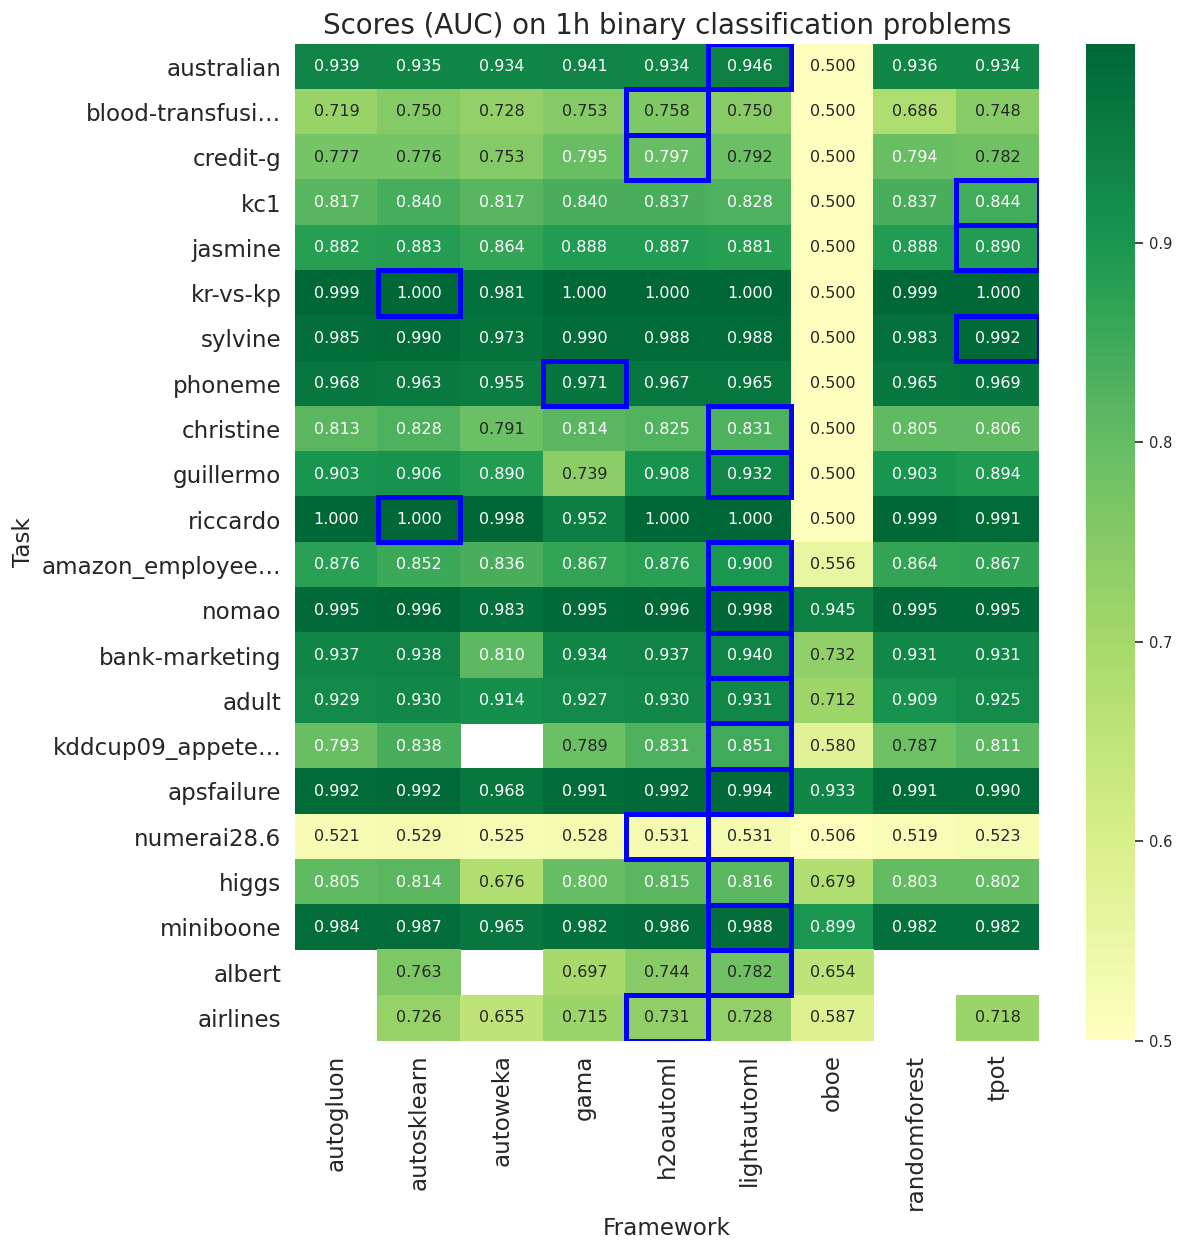

In [44]:
draw_score_heatmap('imp_score',
                   results=heatmap_results,
                   type_filter='binary', 
                   metadata=res.metadata,
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                   filename="binary_score_heat.png",
                   center=0.5,
                  fmt='.3f');

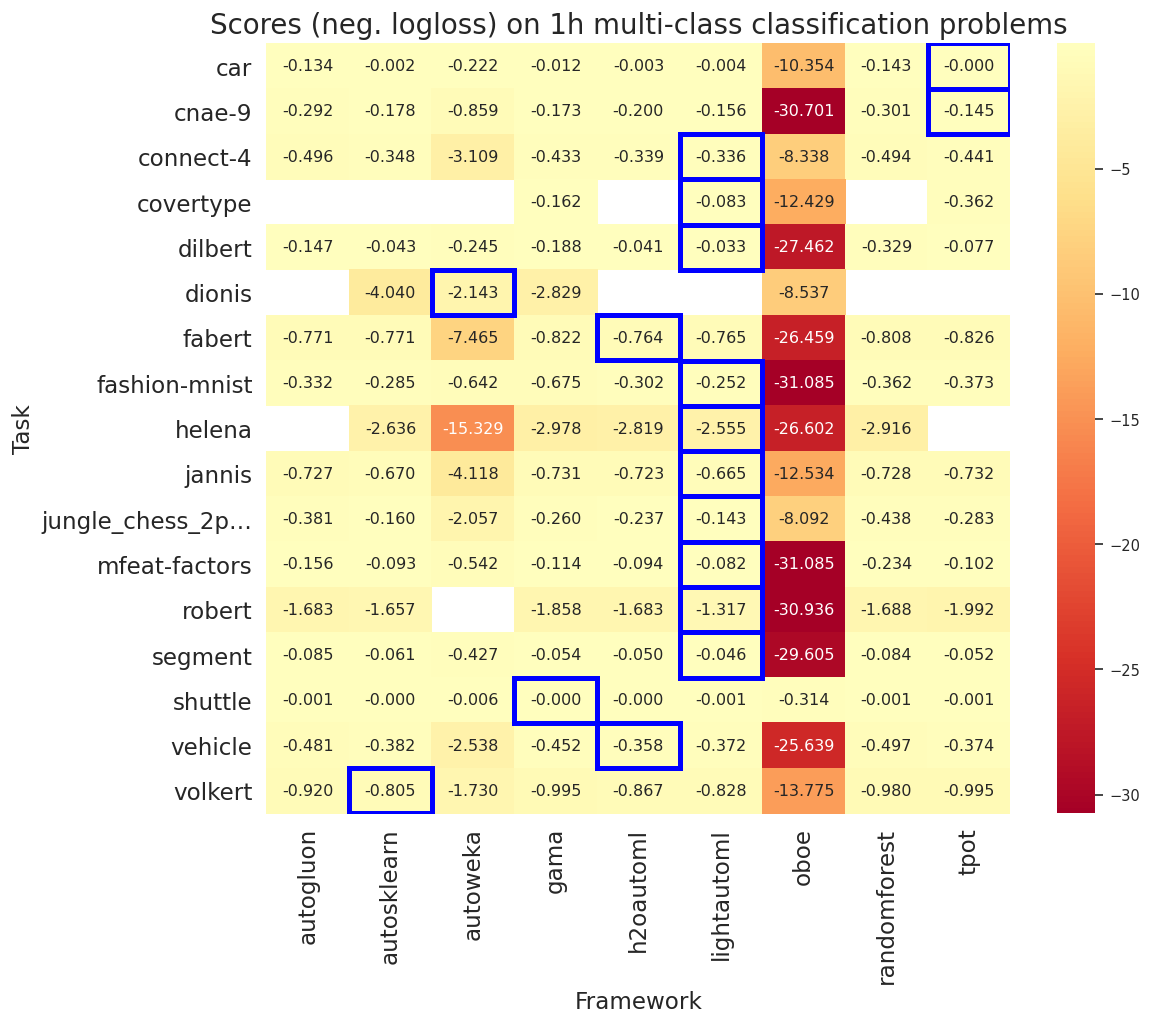

In [45]:
draw_score_heatmap('imp_score', 
                   results=heatmap_results,
                   type_filter='multiclass', 
                   y_sort_by=tasks_sort_by,
                   title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                   filename="multiclass_score_heat.png",
                   center=0,
                  fmt='.3f');

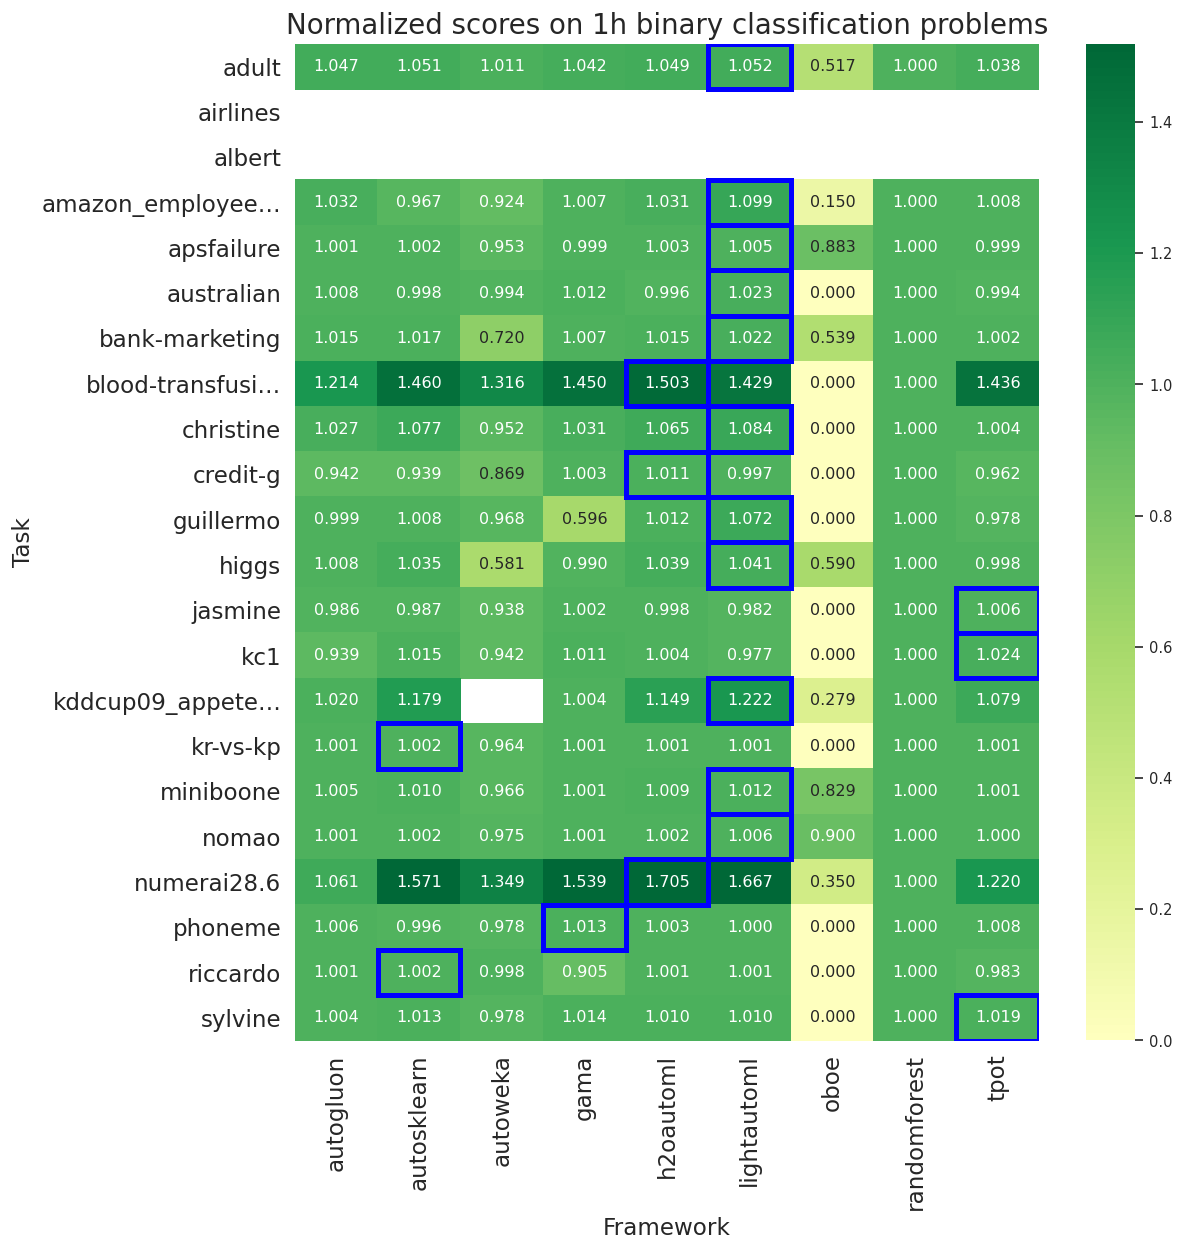

In [46]:
draw_score_heatmap('norm_score', 
                   results=heatmap_results,
                   type_filter='binary', 
                   y_sort_by=tasks_sort_by,
                   title=f"Normalized scores on {results_group} binary classification problems",
                   filename="binary_norm_score_heat.png",
                   center=0,
                  fmt='.3f');

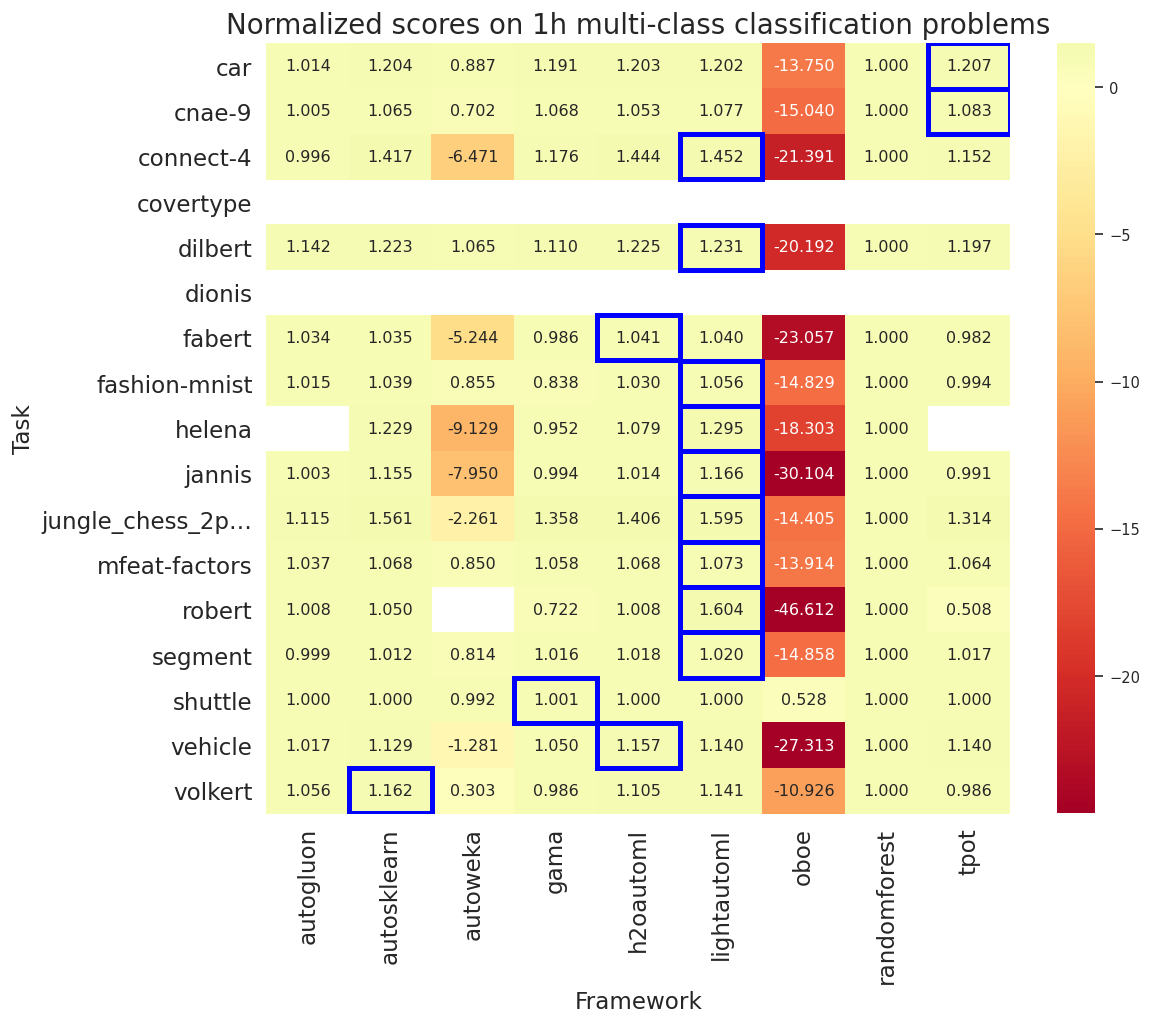

In [47]:
draw_score_heatmap('norm_score',
                   results=heatmap_results,
                   type_filter='multiclass', 
                   y_sort_by=tasks_sort_by,
                   title=f"Normalized scores on {results_group} multi-class classification problems",
                   filename="multiclass_norm_score_heat.png",
                   center=0,
                  fmt='.3f');

### Linear plots

In [48]:
from report import draw_score_parallel_coord

# parallel_coord_results = res.results.loc[~res.results.framework.isin(['randomforest'])]
parallel_coord_results = res.results

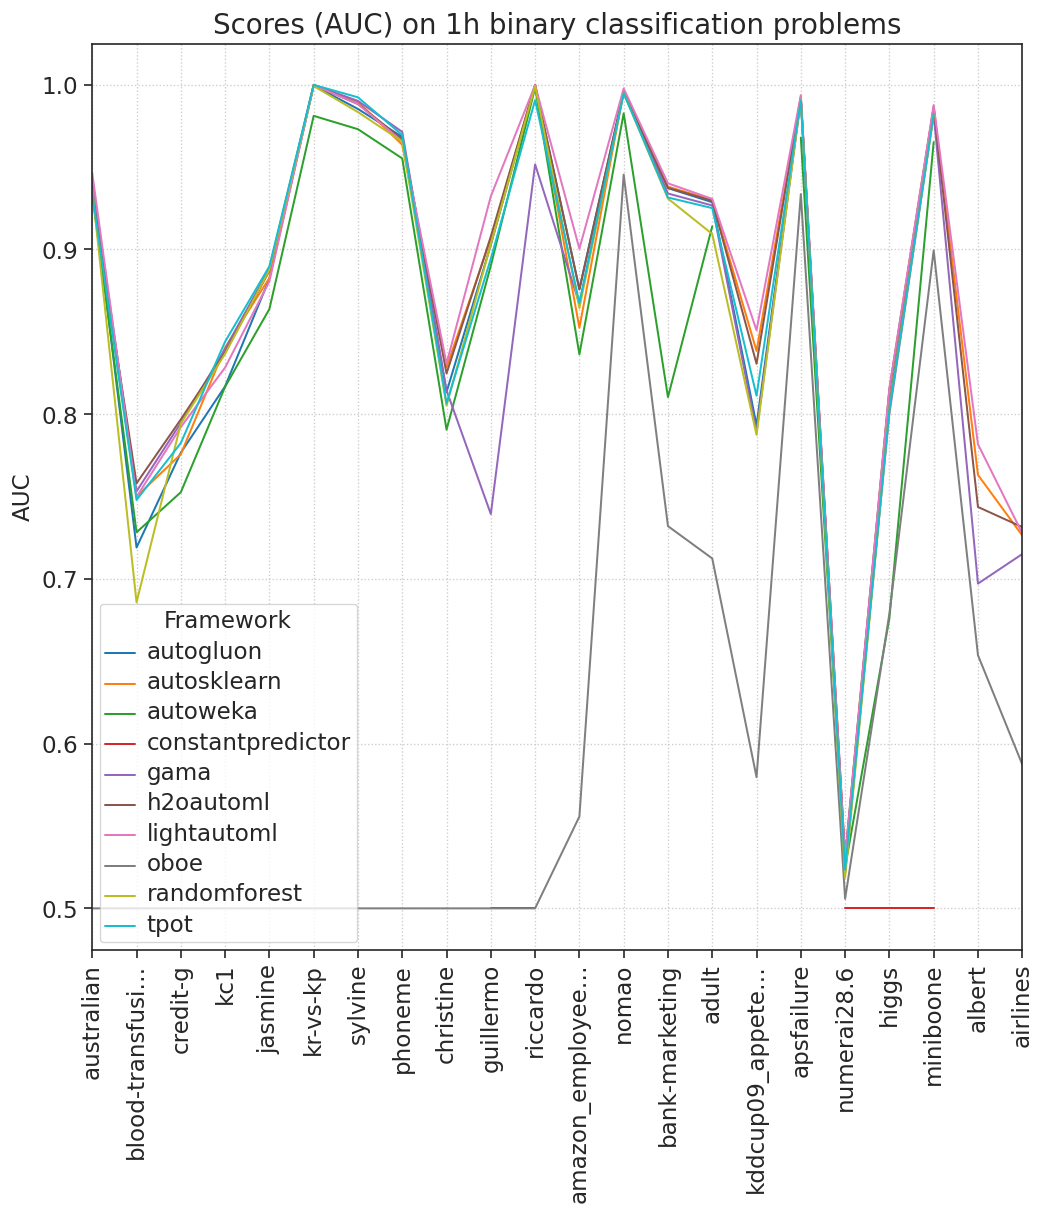

In [49]:
draw_score_parallel_coord('imp_score',
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                          ylabel=binary_score_label,
                          legend_loc='lower left',
                          filename="binary_score_parallel_ccord.png"
                         );


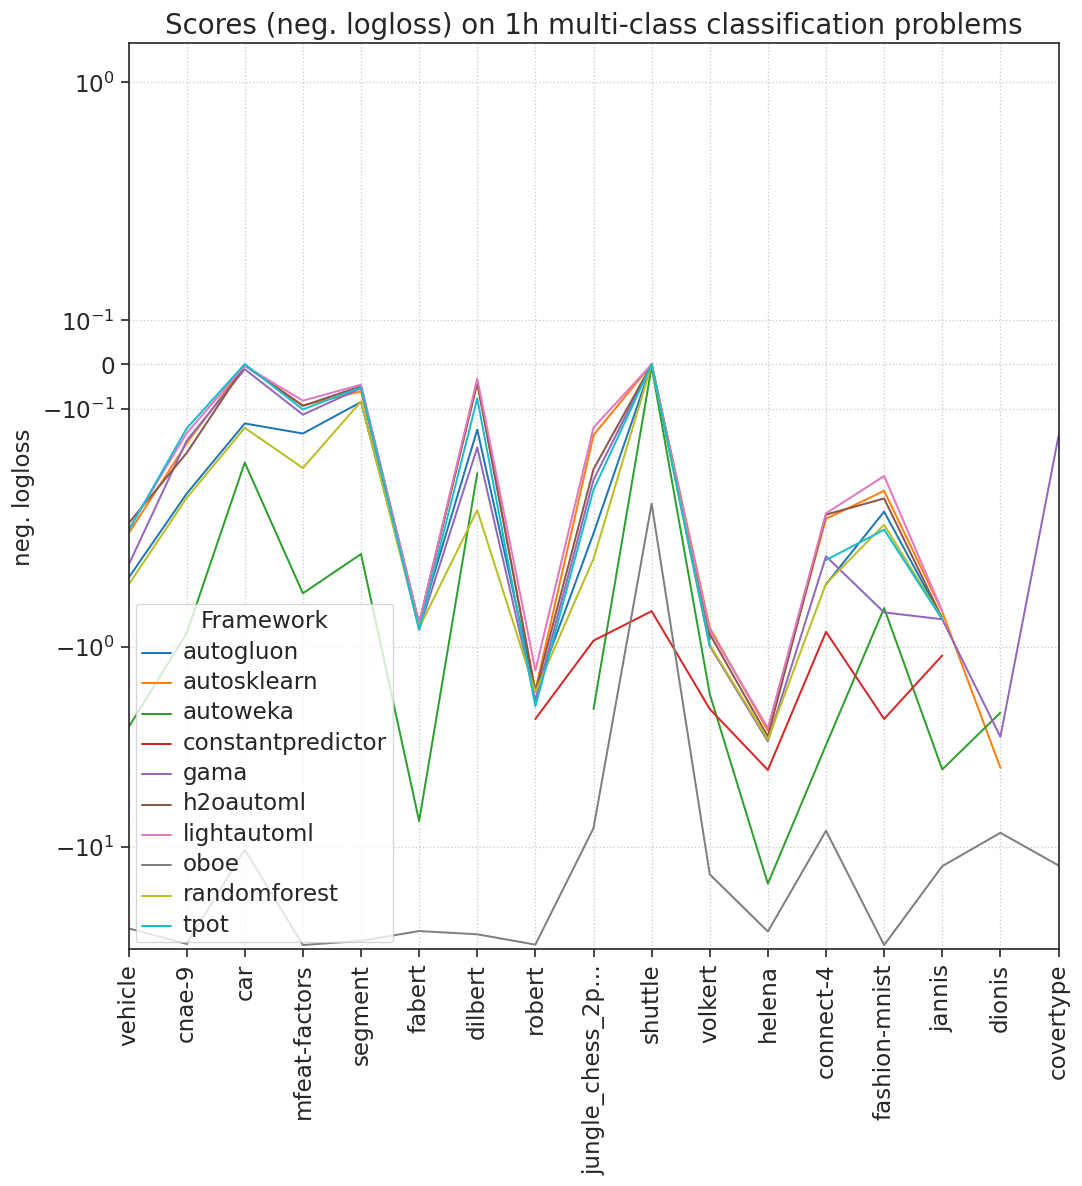

In [50]:
draw_score_parallel_coord('imp_score',
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                          ylabel=multiclass_score_label,
                          yscale=('symlog', dict(linthreshy=0.5)),
                          legend_loc='lower left',
                          filename="multiclass_score_parallel_ccord.png"
                         );


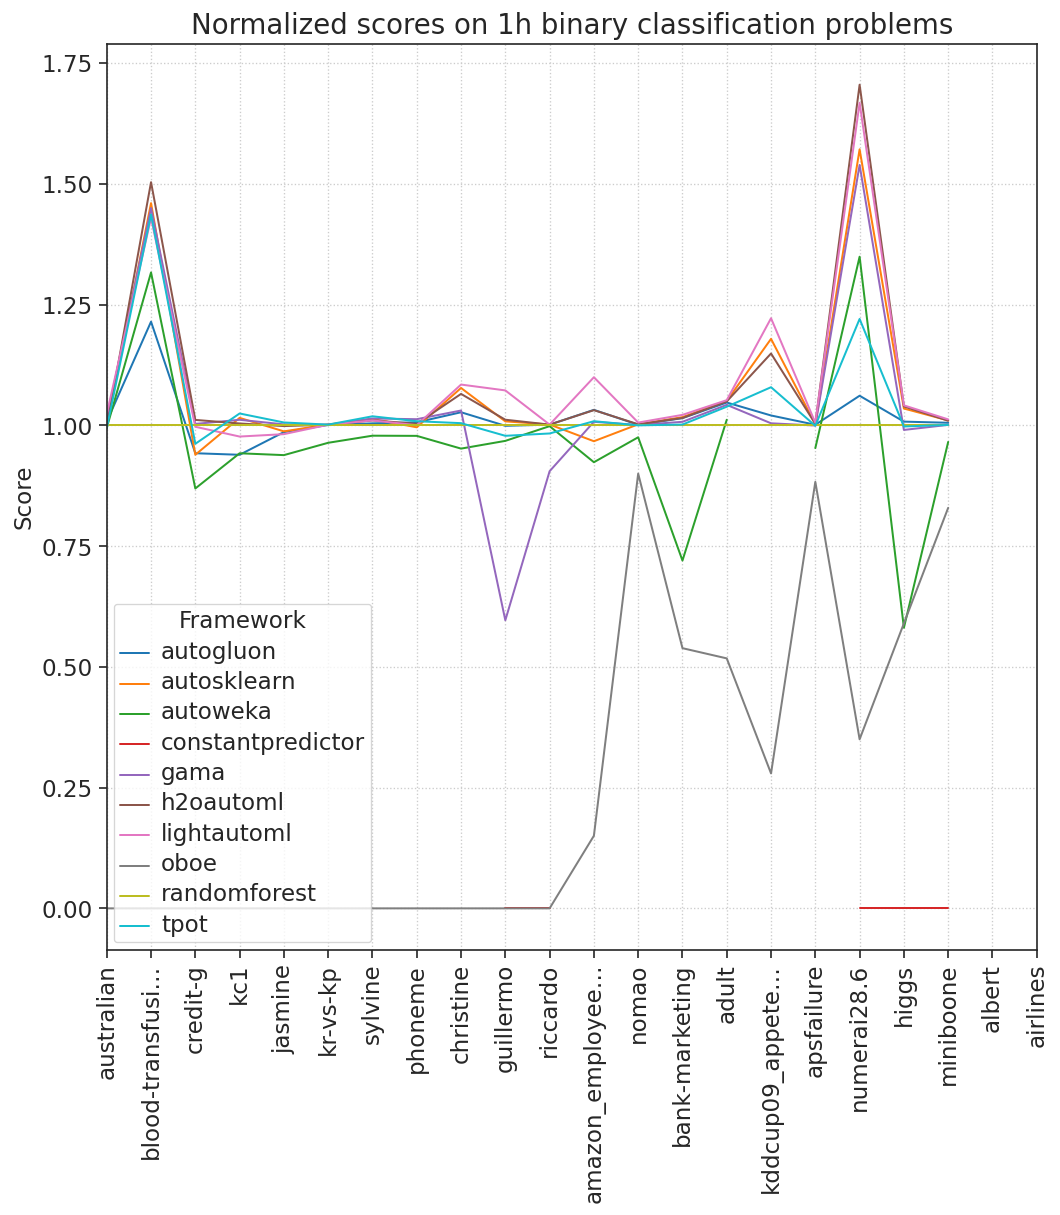

In [51]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='binary', 
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} binary classification problems",
                          legend_loc='lower left',
                          filename="binary_norm_score_parallel_ccord.png"
                         );


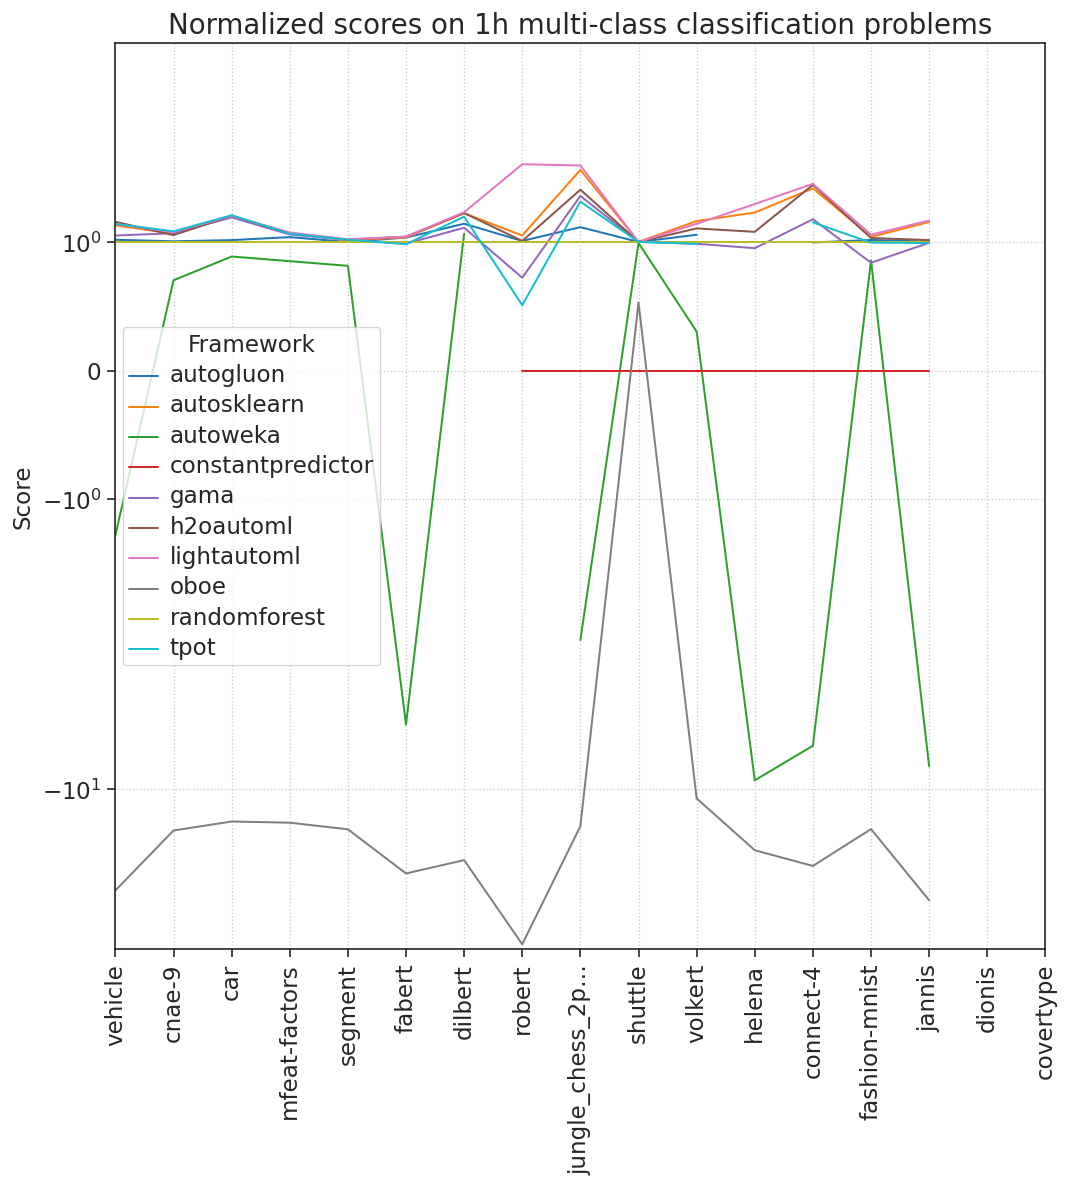

In [52]:
draw_score_parallel_coord('norm_score', 
                          results=parallel_coord_results,
                          type_filter='multiclass',
                          metadata=res.metadata,
                          x_sort_by=tasks_sort_by,
                          title=f"Normalized scores on {results_group} multi-class classification problems",
                          filename="multiclass_norm_score_parallel_ccord.png", 
                          yscale='symlog',
                         );


### Scatterplots

In [53]:
from report import draw_score_stripplot

# scatterplot_results = (res.results.loc[~res.results.framework.isin(['randomforest'])]
#                                   .sort_values(by=['framework']))  # sorting for colors consistency
scatterplot_results = res.results.sort_values(by=['framework'])  # sorting for colors consistency

In [54]:
scatterplot_results

task  fold  framework                   id constraint  \
1454      australian     0  autogluon  openml.org/t/146818       1h8c   
1650      apsfailure     7  autogluon  openml.org/t/168868       1h8c   
1651      apsfailure     8  autogluon  openml.org/t/168868       1h8c   
1652      apsfailure     9  autogluon  openml.org/t/168868       1h8c   
1653  bank-marketing     0  autogluon   openml.org/t/14965       1h8c   
...              ...   ...        ...                  ...        ...   
2281         jasmine     8       tpot  openml.org/t/168911       1h8c   
2282         jasmine     9       tpot  openml.org/t/168911       1h8c   
2283             kc1     0       tpot    openml.org/t/3917       1h8c   
2261        credit-g     8       tpot      openml.org/t/31       1h8c   
2256        credit-g     3       tpot      openml.org/t/31       1h8c   

        result metric    mode version params  ...       auc   logloss  \
1454  0.952462    auc  docker  0.0.12    NaN  ...  0.952462  0.276023   
1650       NaN    auc  docker  0.0.12    NaN  ...       NaN       NaN   
1651  0.988154    auc  docker  0.0.12    NaN  ...  0.988154  0.019821   
1652  0.991280    auc  docker  0.0.12    NaN  ...  0.991280  0.016441   
1653  0.935117    auc  docker  0.0.12    NaN  ...  0.935117  0.195961   
...        ...    ...     ...     ...    ...  ...       ...       ...   
2281  0.893563    auc  docker  0.11.5    NaN  ...  0.893563  0.391086   
2282  0.886762    auc  docker  0.11.5    NaN  ...  0.886762  0.381266   
2283  0.863914    auc  docker  0.11.5    NaN  ...  0.863914  0.296760   
2261  0.751429    auc  docker  0.11.5    NaN  ...  0.751429  0.525544   
2256  0.755714    auc  docker  0.11.5    NaN  ...  0.755714  0.544415   

      predict_duration  models_ensemble_count    type metric_type     score  \
1454          18.30340                    5.0  binary         fit  0.952462   
1650               NaN                    NaN  binary        loss       NaN   
1651           2.77678                    5.0  binary         fit  0.988154   
1652          17.89000                    5.0  binary         fit  0.991280   
1653           2.06922                    4.0  binary         fit  0.935117   
...                ...                    ...     ...         ...       ...   
2281               NaN                    NaN  binary         fit  0.893563   
2282               NaN                    NaN  binary         fit  0.886762   
2283               NaN                    NaN  binary         fit  0.863914   
2261               NaN                    NaN  binary         fit  0.751429   
2256               NaN                    NaN  binary         fit  0.755714   

      imp_result  imp_score  norm_score  
1454    0.952462   0.952462    1.009471  
1650    0.992667   0.992667    1.000000  
1651    0.988154   0.988154    1.000931  
1652    0.991280   0.991280    0.997764  
1653    0.935117   0.935117    1.007288  
...          ...        ...         ...  
2281    0.893563   0.893563    0.999827  
2282    0.886762   0.886762    1.001108  
2283    0.863914   0.863914    1.019316  
2261    0.751429   0.751429    1.045547  
2256    0.755714   0.755714    0.923472  

[3702 rows x 27 columns]

In [55]:
import matplotlib as mp
import seaborn as sb

import report.config as config
from report.util import create_file, sort_dataframe
from report.visualizations.util import savefig, set_scales, set_labels, task_labels


def draw_stripplot(df, x, y, hue,
                   xscale='linear', xbound=None,
                   xlabel=None, ylabel=None, y_labels=None, title=None,
                   legend_title=None, legend_loc='best', colormap=None):
    colormap = config.colormap if colormap is None else colormap
    with sb.axes_style('whitegrid', rc={'grid.linestyle': 'dotted'}), sb.plotting_context('paper'):
        # print(sb.axes_style())
        # Initialize the figure
        strip_fig, axes = mp.pyplot.subplots(dpi=120, figsize=(10, len(df.index.unique())))
        set_scales(axes, xscale=xscale)
        if xbound is not None:
            axes.set_autoscalex_on(False)
            axes.set_xbound(*xbound)
            # axes.invert_xaxis()
        sb.despine(bottom=True, left=True)
        
        
        
        global aaa
        global bbb, ccc
        aaa = x
        bbb = y
        ccc = df 

# #         Show each observation with a scatterplot
#         sb.stripplot(x=x, y=y, hue=hue,
#                      data=df, dodge=True, jitter=True, palette=colormap,
#                      alpha=.25, zorder=1)

#         # Show the conditional means
#         sb.pointplot(x=x, y=y, hue=hue,
#                      data=df, dodge=.5, join=False, palette=colormap,
#                      markers='d', scale=.75, ci=None)

        sb.boxplot(x=x, y=y, hue=hue,
             data=df, dodge=True, palette=colormap)




        # Improve the legend
        handles, labels = axes.get_legend_handles_labels()
        dist = int(len(labels)/2)
        print(labels)
        print(labels[dist:])
        dist = 0
        
        axes.legend(handles[dist:], labels[dist:], title=legend_title or hue,
                    handletextpad=0, columnspacing=1,
                    loc=legend_loc, ncol=1, frameon=True)

        set_labels(axes, title=title, xlabel=xlabel, ylabel=ylabel, y_labels=y_labels)
        return strip_fig


def draw_score_stripplot(col, results, type_filter='all', metadata=None,
                         y_sort_by='name', filename=None, **kwargs):
    sort_by = (None if not metadata
               else lambda row: row.task.apply(lambda t: getattr(metadata[t], y_sort_by)))
    scatterplot_df = sort_dataframe(results.set_index(['type', 'task']), by=sort_by)
    df = scatterplot_df if type_filter == 'all' \
        else scatterplot_df[scatterplot_df.index.get_loc(type_filter)]
    
    y_labels = task_labels(df.index.unique())
    df.reset_index(level=0, drop=True, inplace=True)
    
    fig = draw_stripplot(
        df,
        x=col,
        y=df.index,
        hue='framework',
        # ylabel='Task',
        y_labels=y_labels,
        legend_title="Framework",
        **kwargs
    )
    if filename:
        savefig(fig, create_file("graphics", config.results_group, filename))
    return fig



['autogluon', 'autosklearn', 'autoweka', 'gama', 'h2oautoml', 'lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']
['lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']


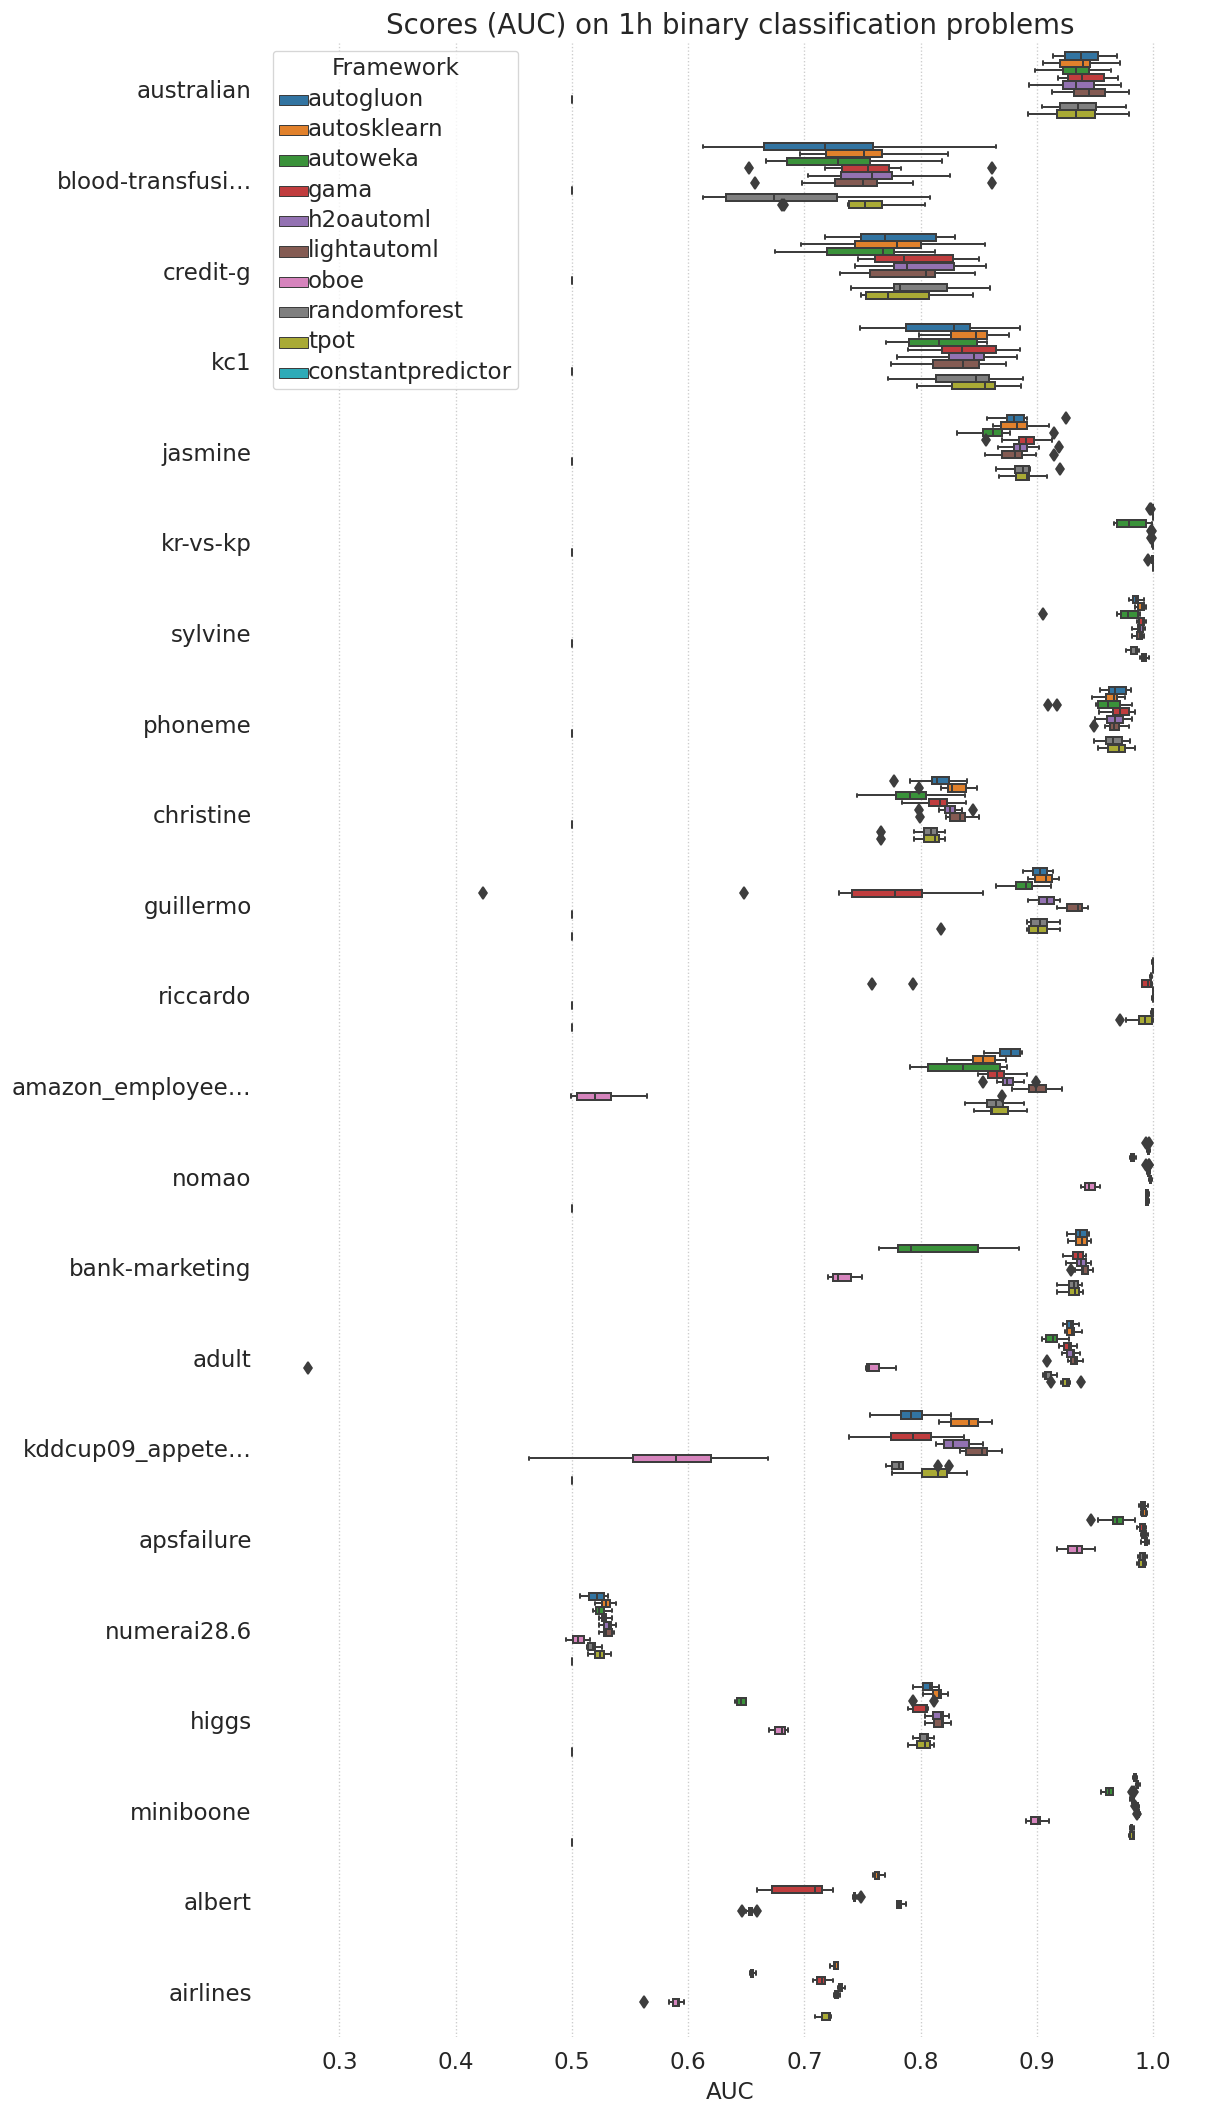

In [56]:
draw_score_stripplot('imp_result', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     title=f"Scores ({binary_score_label}) on {results_group} binary classification problems",
                     xlabel=binary_score_label,
                     filename="binary_results_stripplot.png");

In [57]:
scatterplot_results

task  fold  framework                   id constraint  \
1454      australian     0  autogluon  openml.org/t/146818       1h8c   
1650      apsfailure     7  autogluon  openml.org/t/168868       1h8c   
1651      apsfailure     8  autogluon  openml.org/t/168868       1h8c   
1652      apsfailure     9  autogluon  openml.org/t/168868       1h8c   
1653  bank-marketing     0  autogluon   openml.org/t/14965       1h8c   
...              ...   ...        ...                  ...        ...   
2281         jasmine     8       tpot  openml.org/t/168911       1h8c   
2282         jasmine     9       tpot  openml.org/t/168911       1h8c   
2283             kc1     0       tpot    openml.org/t/3917       1h8c   
2261        credit-g     8       tpot      openml.org/t/31       1h8c   
2256        credit-g     3       tpot      openml.org/t/31       1h8c   

        result metric    mode version params  ...       auc   logloss  \
1454  0.952462    auc  docker  0.0.12    NaN  ...  0.952462  0.276023   
1650       NaN    auc  docker  0.0.12    NaN  ...       NaN       NaN   
1651  0.988154    auc  docker  0.0.12    NaN  ...  0.988154  0.019821   
1652  0.991280    auc  docker  0.0.12    NaN  ...  0.991280  0.016441   
1653  0.935117    auc  docker  0.0.12    NaN  ...  0.935117  0.195961   
...        ...    ...     ...     ...    ...  ...       ...       ...   
2281  0.893563    auc  docker  0.11.5    NaN  ...  0.893563  0.391086   
2282  0.886762    auc  docker  0.11.5    NaN  ...  0.886762  0.381266   
2283  0.863914    auc  docker  0.11.5    NaN  ...  0.863914  0.296760   
2261  0.751429    auc  docker  0.11.5    NaN  ...  0.751429  0.525544   
2256  0.755714    auc  docker  0.11.5    NaN  ...  0.755714  0.544415   

      predict_duration  models_ensemble_count    type metric_type     score  \
1454          18.30340                    5.0  binary         fit  0.952462   
1650               NaN                    NaN  binary        loss       NaN   
1651           2.77678                    5.0  binary         fit  0.988154   
1652          17.89000                    5.0  binary         fit  0.991280   
1653           2.06922                    4.0  binary         fit  0.935117   
...                ...                    ...     ...         ...       ...   
2281               NaN                    NaN  binary         fit  0.893563   
2282               NaN                    NaN  binary         fit  0.886762   
2283               NaN                    NaN  binary         fit  0.863914   
2261               NaN                    NaN  binary         fit  0.751429   
2256               NaN                    NaN  binary         fit  0.755714   

      imp_result  imp_score  norm_score  
1454    0.952462   0.952462    1.009471  
1650    0.992667   0.992667    1.000000  
1651    0.988154   0.988154    1.000931  
1652    0.991280   0.991280    0.997764  
1653    0.935117   0.935117    1.007288  
...          ...        ...         ...  
2281    0.893563   0.893563    0.999827  
2282    0.886762   0.886762    1.001108  
2283    0.863914   0.863914    1.019316  
2261    0.751429   0.751429    1.045547  
2256    0.755714   0.755714    0.923472  

[3702 rows x 27 columns]

In [58]:
import pandas as pd
pd.__version__

'1.1.3'

['autogluon', 'autosklearn', 'autoweka', 'gama', 'h2oautoml', 'lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']
['lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']


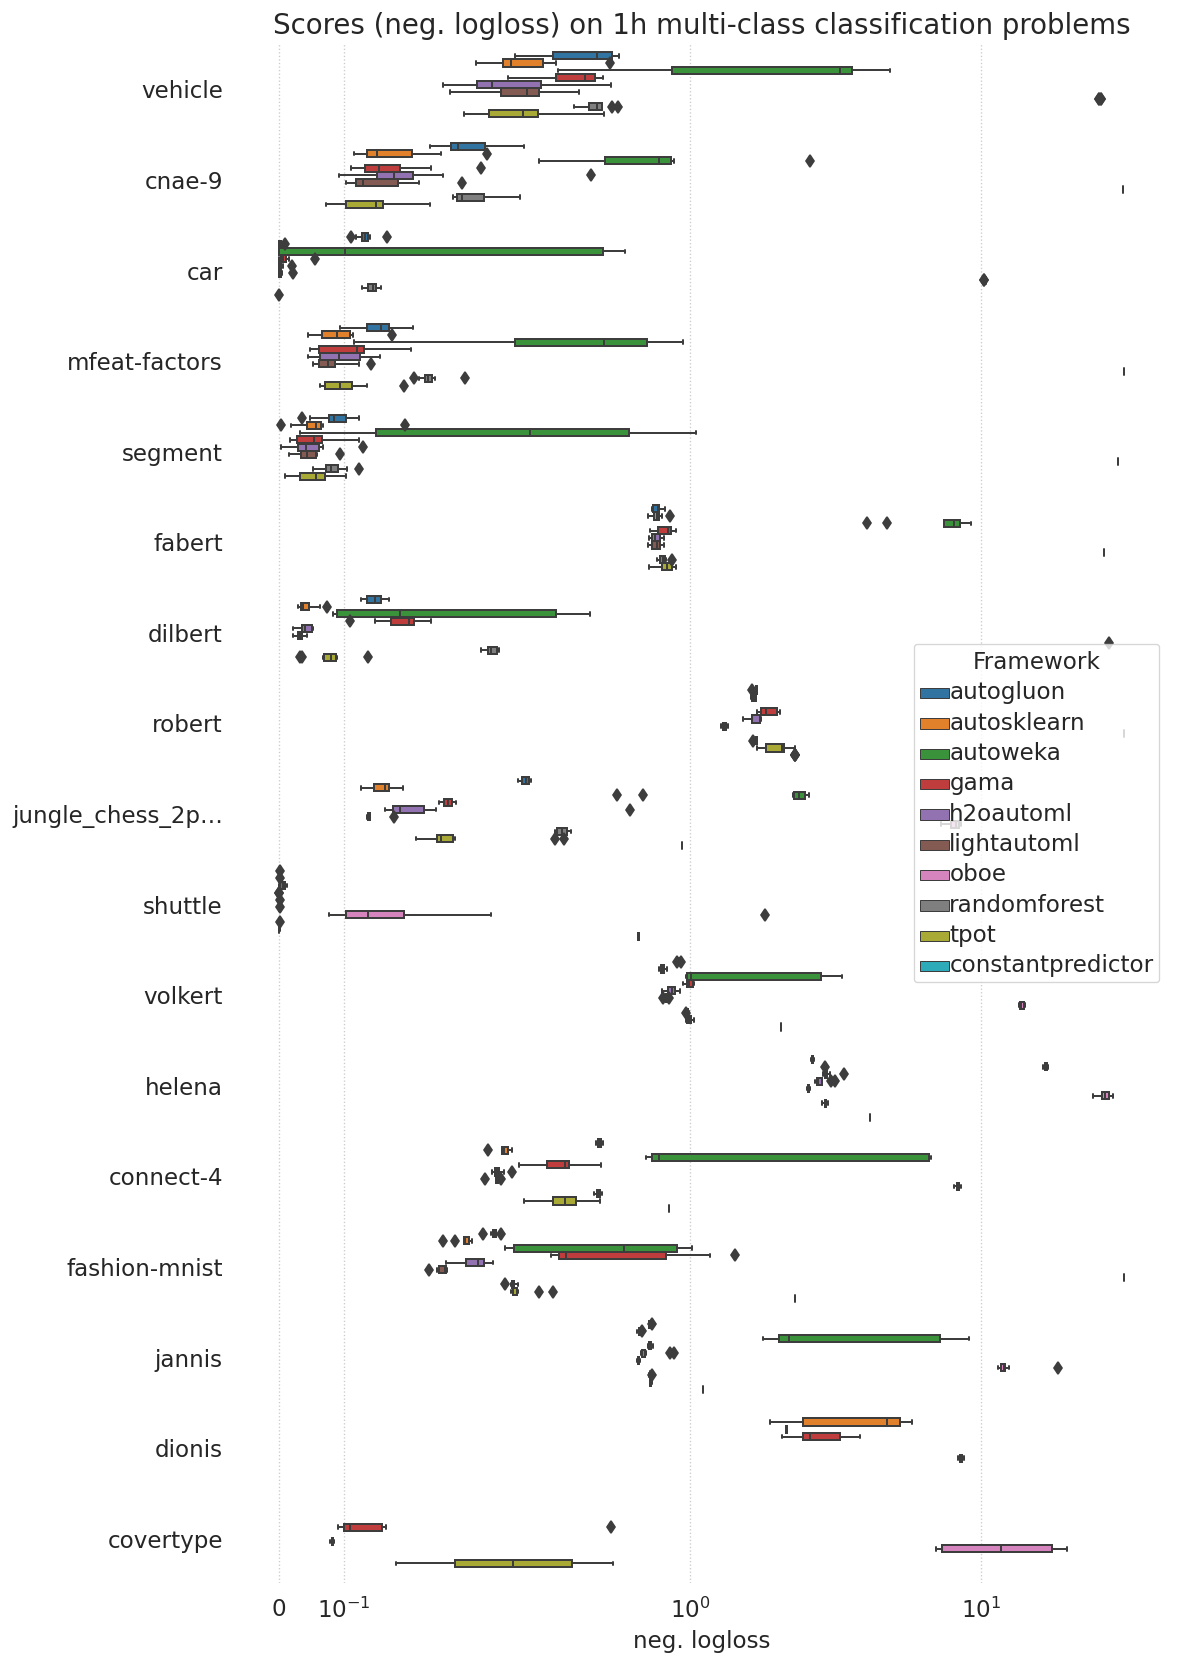

In [59]:
draw_score_stripplot('imp_result',
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
#                      xbound=(0,10),
                     xscale=('symlog', dict(linthreshx=0.5)),
                     title=f"Scores ({multiclass_score_label}) on {results_group} multi-class classification problems",
                     xlabel=multiclass_score_label, 
                     filename="multiclass_results_stripplot.png");

['autogluon', 'autosklearn', 'autoweka', 'gama', 'h2oautoml', 'lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']
['lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']


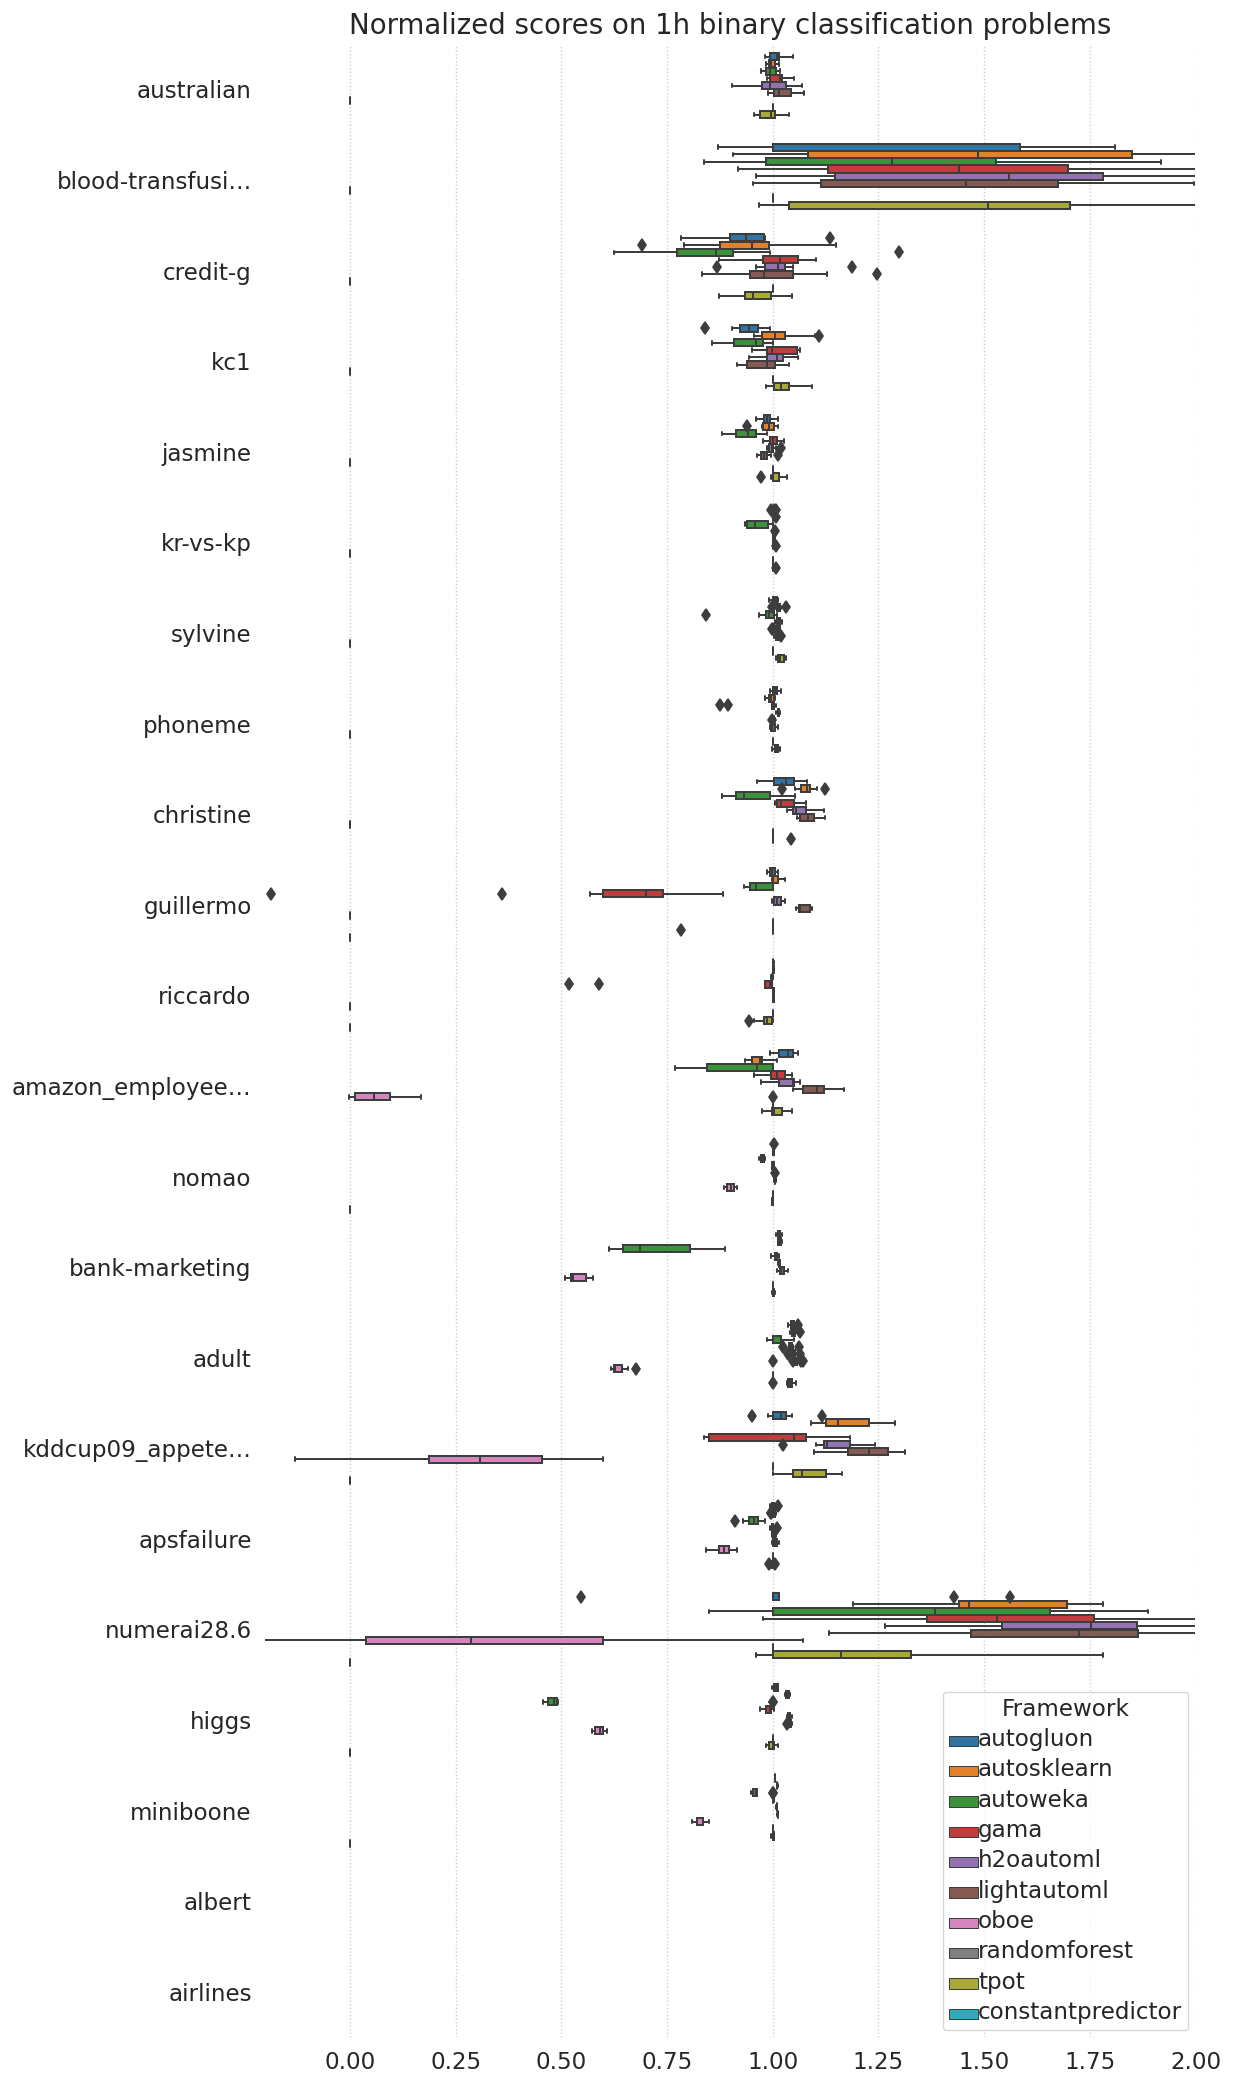

In [60]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='binary', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} binary classification problems",
                     filename="binary_norm_score_stripplot.png");

['autogluon', 'autosklearn', 'autoweka', 'gama', 'h2oautoml', 'lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']
['lightautoml', 'oboe', 'randomforest', 'tpot', 'constantpredictor']


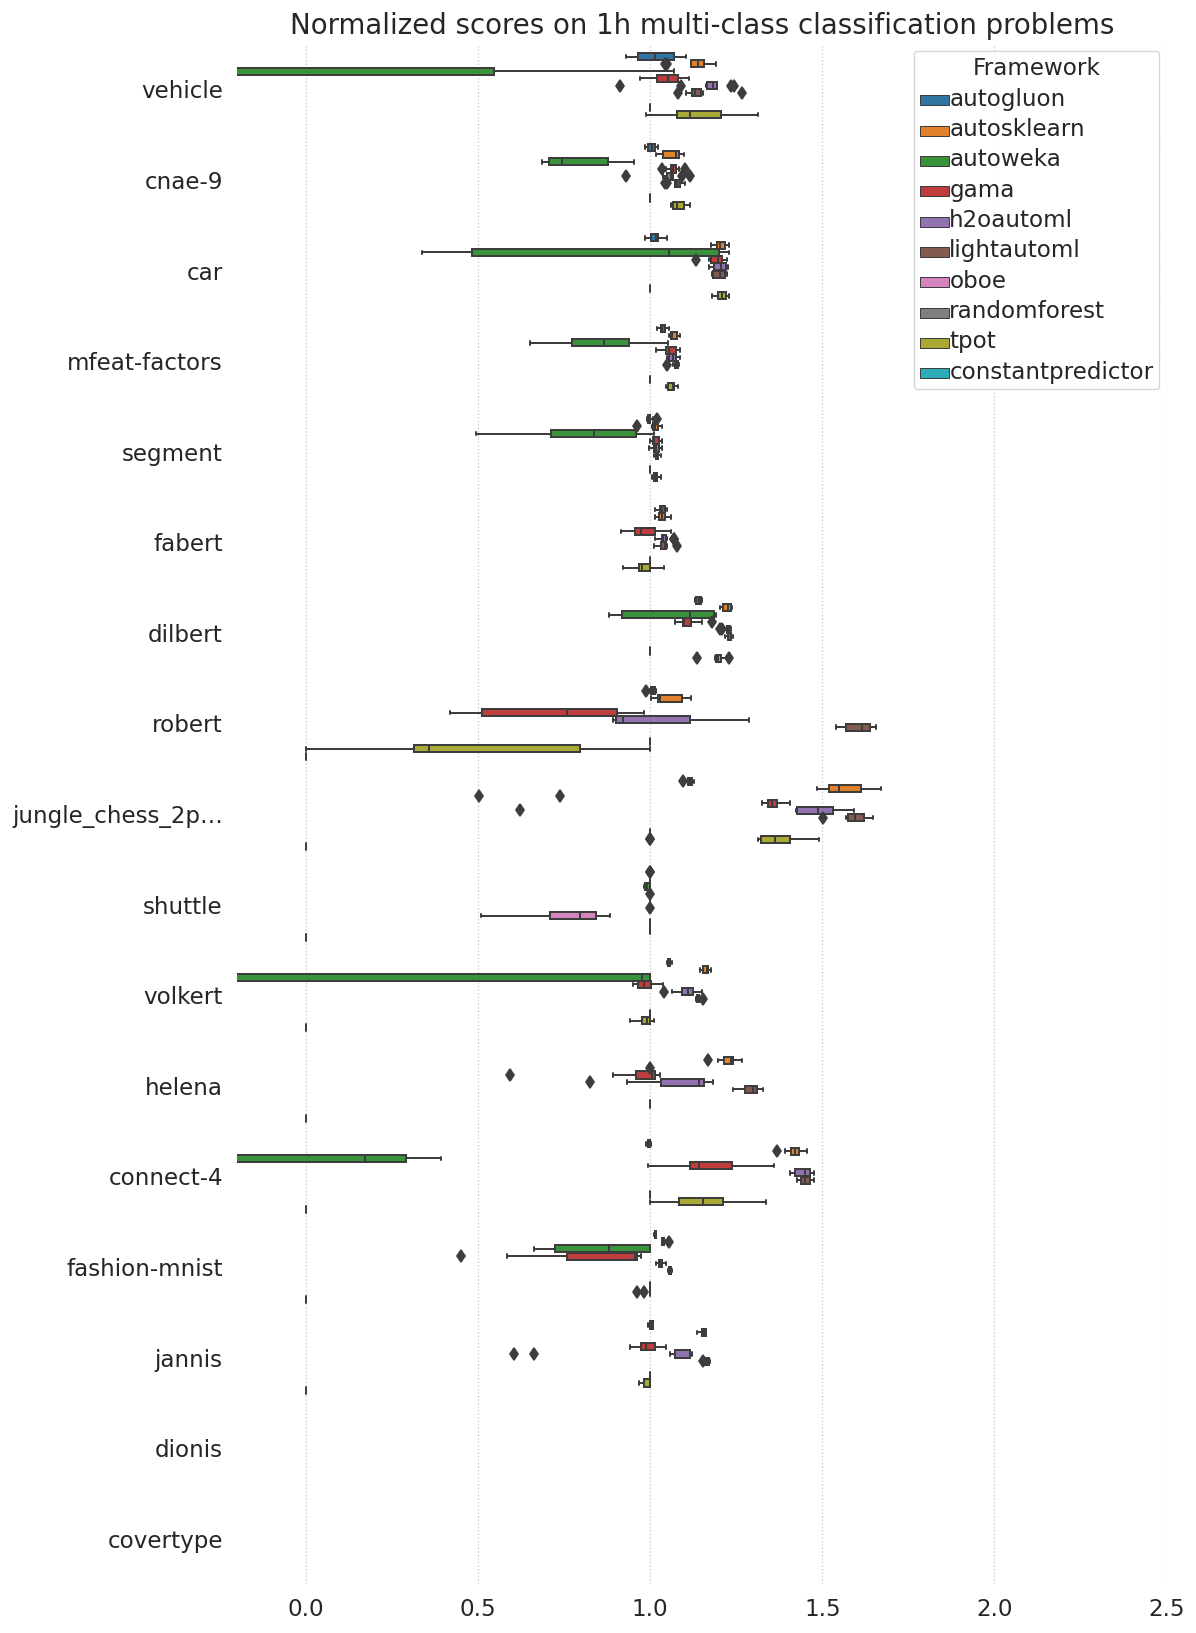

In [61]:
draw_score_stripplot('norm_score', 
                     results=scatterplot_results,
                     type_filter='multiclass', 
                     metadata=res.metadata,
                     y_sort_by=tasks_sort_by,
                     xbound=(-0.2, 2.5),
                     xscale='linear',
                     title=f"Normalized scores on {results_group} multi-class classification problems",
                     filename="multiclass_norm_score_stripplot.png");

## Playground

In [62]:
import yaml

In [63]:
mapping = {}
yaml_file = None
with open("../resources/benchmarks/small.yaml", 'r') as stream:
    try:
        yaml_file = yaml.safe_load(stream)
        [x['openml_task_id']  for x in yaml_file]
        
    except yaml.YAMLError as exc:
        print(exc)

In [64]:
yaml_file

[{'name': 'Australian', 'openml_task_id': 146818},
 {'name': 'blood-transfusion', 'openml_task_id': 10101},
 {'name': 'car', 'openml_task_id': 146821},
 {'name': 'christine', 'openml_task_id': 168908},
 {'name': 'cnae-9', 'openml_task_id': 9981},
 {'name': 'credit-g', 'openml_task_id': 31},
 {'name': 'dilbert', 'openml_task_id': 168909},
 {'name': 'fabert', 'openml_task_id': 168910},
 {'name': 'jasmine', 'openml_task_id': 168911},
 {'name': 'kc1', 'openml_task_id': 3917},
 {'name': 'kr-vs-kp', 'openml_task_id': 3},
 {'name': 'mfeat-factors', 'openml_task_id': 12},
 {'name': 'phoneme', 'openml_task_id': 9952},
 {'name': 'segment', 'openml_task_id': 146822},
 {'name': 'sylvine', 'openml_task_id': 168912},
 {'name': 'vehicle', 'openml_task_id': 53}]

In [65]:
def get_sizes():
    sizes = ['../resources/benchmarks/small.yaml',
             '../resources/benchmarks/medium.yaml',
             '../resources/benchmarks/large.yaml'
            ]

    mapping = []
    
    for size in sizes:
        with open(size, 'r') as stream:
            size_name = size.split('/')[-1].split('.')[0]
            yaml_file = yaml.safe_load(stream)
            for x in yaml_file:
                mapping.append({'task': 'openml.org/t/' + str(x['openml_task_id']), 'size_name': size_name})

    return pd.DataFrame(mapping)

In [66]:
sizes = get_sizes()

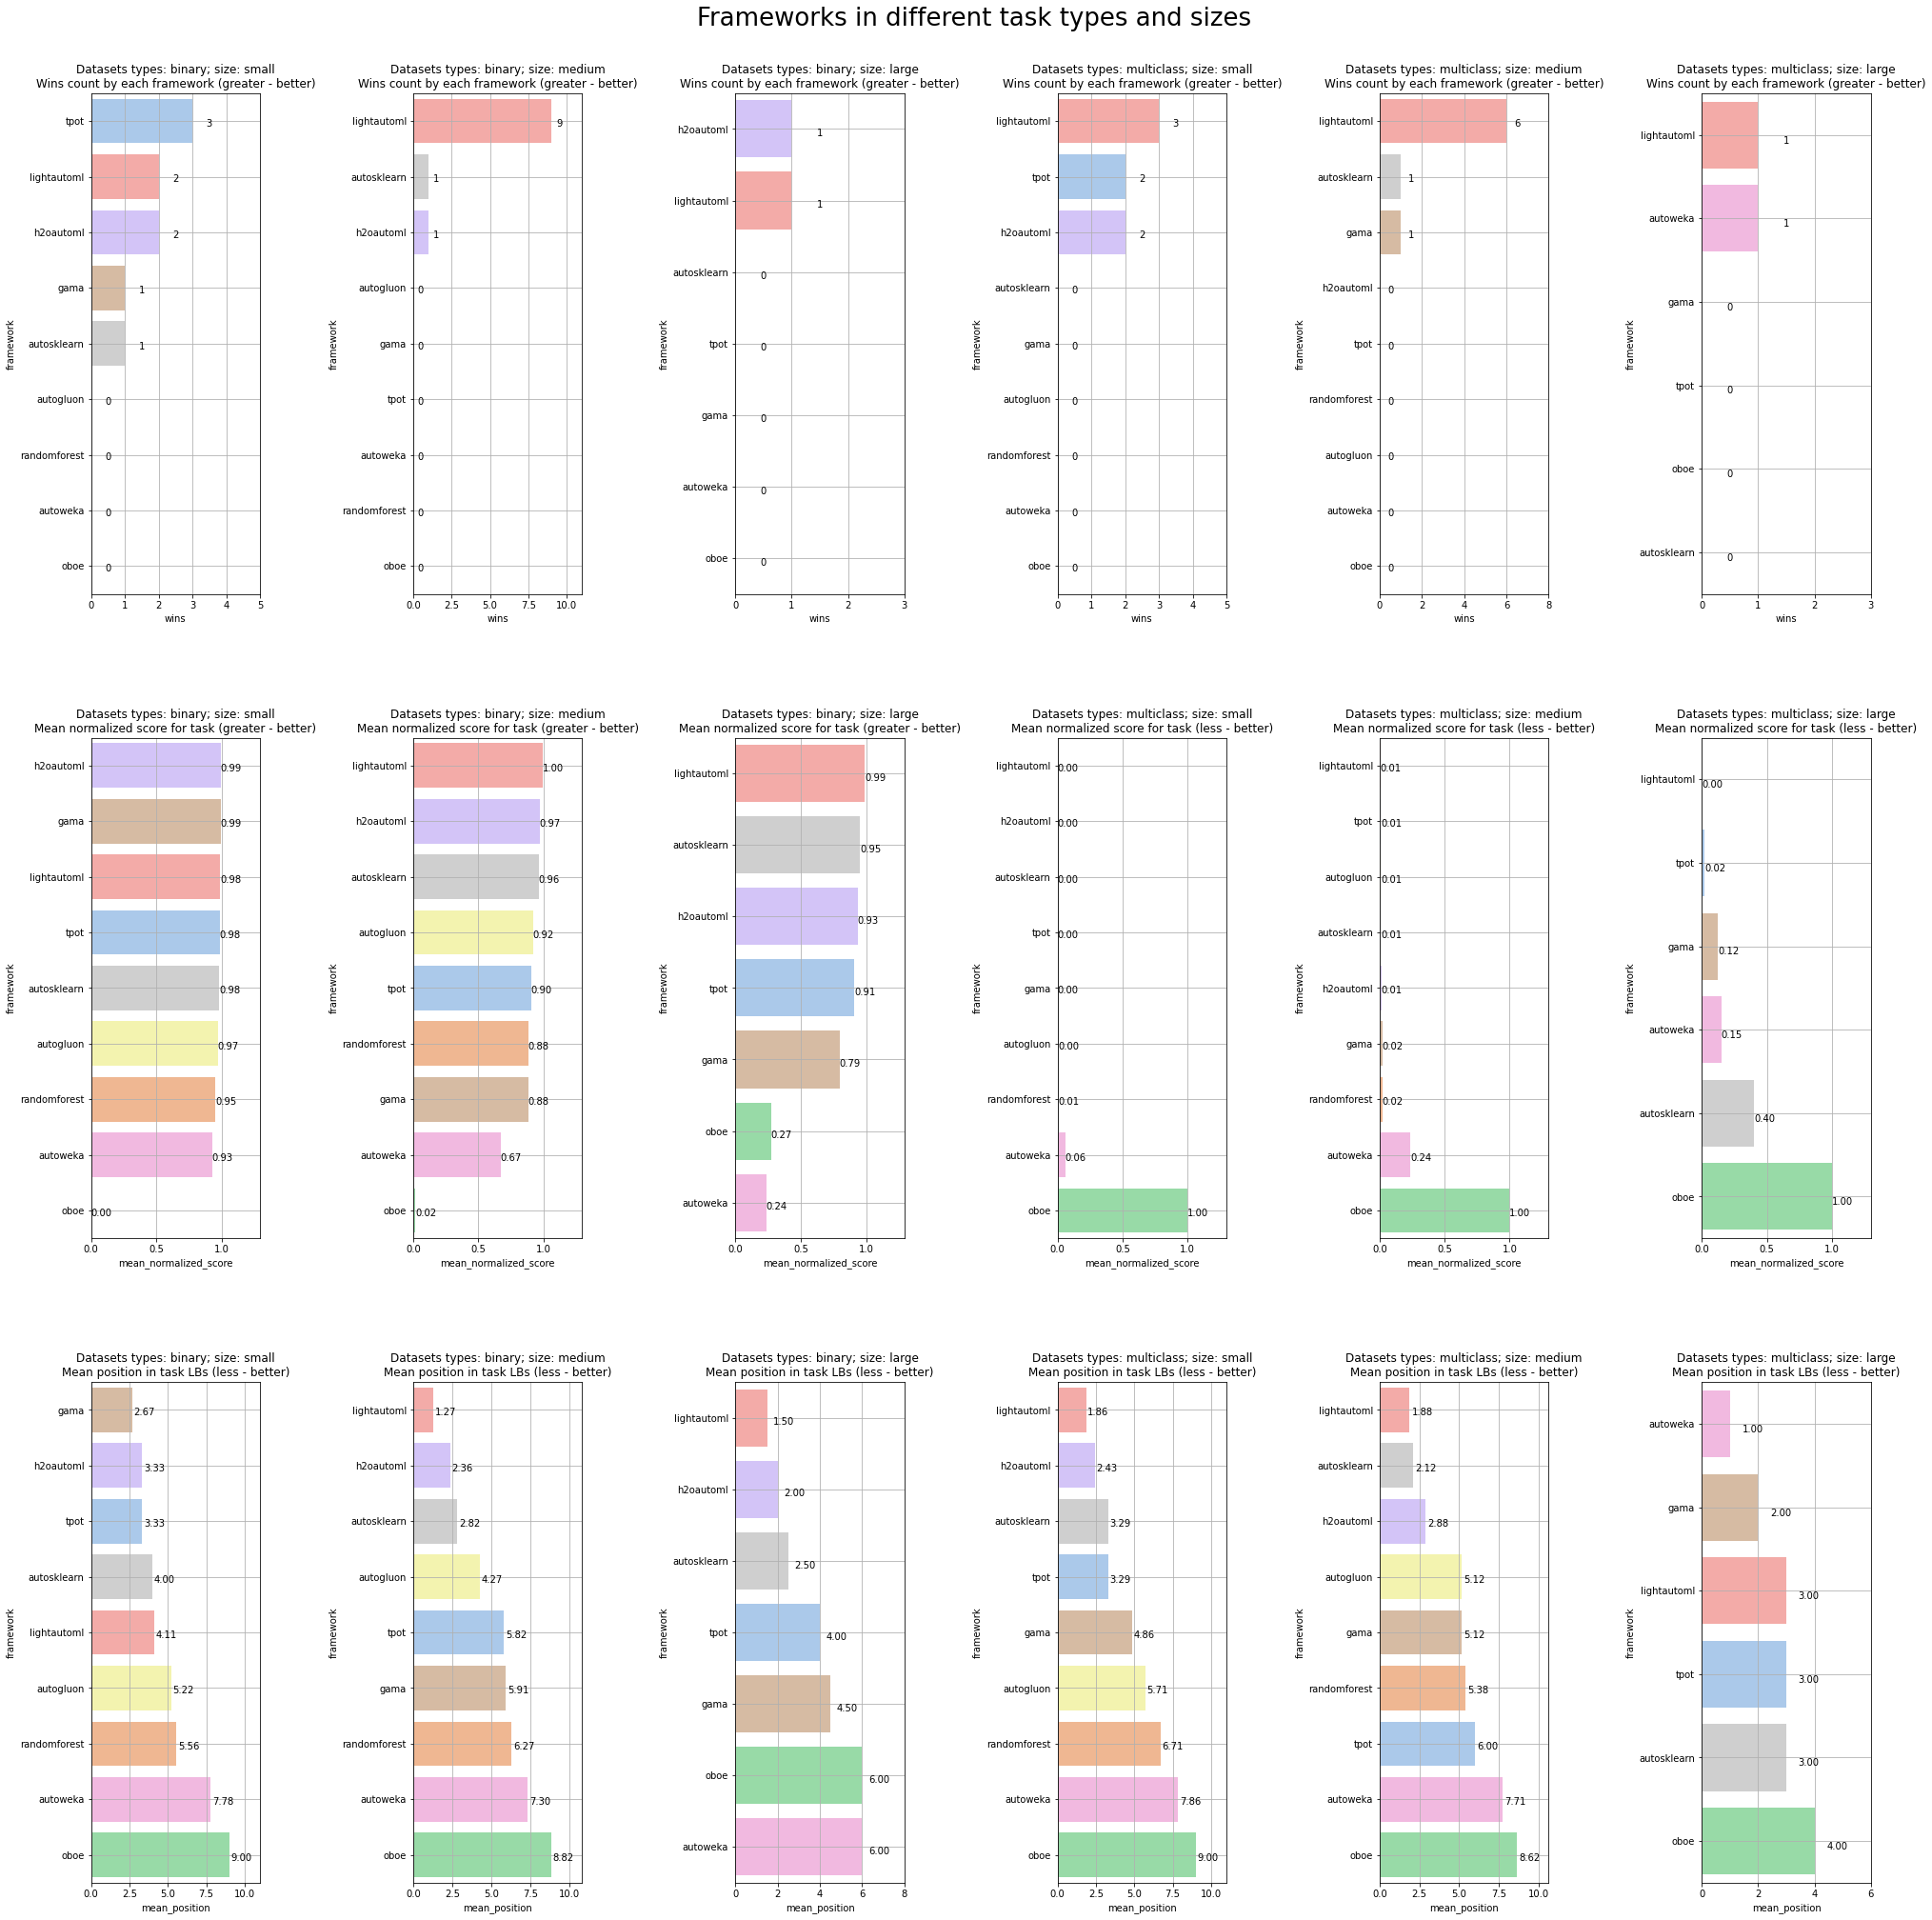

In [97]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



all_results_arr = []

df = pd.merge(heatmap_results, 
              pd.merge(
                  metadata,
                  sizes,
                  on='task'
              )[['task', 'size_name']].rename(columns={'task': 'id'}), on='id')

f, axs = plt.subplots(3, 
                      len(df.type.unique()) * 
                      len(df.size_name.unique()), 
    figsize=(30, 30), #sharey=True#sharex=True
)
f.tight_layout(pad=13.0)
f.suptitle('Frameworks in different task types and sizes', fontsize=26)

# Set your custom color palette
colors = sns.color_palette("pastel", len(heatmap_results.framework.unique()))
sns.set_palette(sns.color_palette(colors))

clrs = {framework: color for framework, color in zip(sorted(heatmap_results.framework.unique(), reverse=True), list(colors))}

for i, size_name in enumerate(df.size_name.unique()):
    for j, task_type in enumerate(df.type.unique()):
        # filters
        sel_openml = df[(df.type == task_type) & (df.size_name == size_name)]
        metric = sel_openml.metric.iloc[0]

        if metric == 'auc':
            sort_fl = False
            fillna_value = 0.5
            norm_score_str = 'greater'
            graphs_offs = [0.5, 0.8, 0.08]
        elif metric == 'logloss':
            sort_fl = True
            norm_score_str = 'less'
            fillna_value = 1
            graphs_offs = [0.5, 0.8, 0.08]
        else:
            raise
        
        sel_openml = sel_openml.groupby(['task', 'framework']).agg({metric:np.mean, 'duration': np.mean}).reset_index()
        all_sel_results = sel_openml.sort_values(['task', metric], ascending = [True, sort_fl])
        all_sel_results[metric].fillna(fillna_value, inplace = True)

        positions = {}
        scores = {}
        wins = {}
        for name, group in all_sel_results.groupby('task'):
            group[metric] = (group[metric] - group[metric].min()) / (group[metric].max() - group[metric].min())

            for it,(fr,m) in enumerate(zip(group['framework'], group[metric])):
                if fr not in positions:
                    positions[fr] = []
                if fr not in scores:
                    scores[fr] = []

                positions[fr].append(it)
                scores[fr].append(m)

        for k in positions:
            wins[k] = sum(np.array(positions[k]) == 0)
            positions[k] = np.mean(positions[k])
            scores[k] = np.mean(scores[k])

        results = pd.DataFrame({'framework': list(positions.keys())})
        results['wins'] = results['framework'].map(wins)
        results['mean_position'] = results['framework'].map(positions) + 1
        results['mean_normalized_score'] = results['framework'].map(scores)
        all_results_arr.append(results)
        
        # wins
        ax=axs[0][i+j*len(df.size_name.unique())]
        col = 'wins'
        results.sort_values(col, ascending = False, inplace = True)
        sns.barplot(x = col, y = 'framework', data = results, ax=ax, palette=clrs)
        ax.title.set_text('Datasets types: {}; size: {}\n'.format(task_type, size_name) + 'Wins count by each framework (greater - better)')
        ax.set_xlim([0, results[col].max() + 2])
        ax.grid()
        for index, val in enumerate(results[col]):
            ax.text(val + graphs_offs[0],  index + 0.1,  val, color='black', ha="center")

        # mean score
        ax=axs[1][i+j*len(df.size_name.unique())]
        col = 'mean_normalized_score'
        results.sort_values(col, ascending = sort_fl, inplace = True)
        sns.barplot(x = col, y = 'framework', data = results, ax=ax, palette=clrs)
        ax.title.set_text('Datasets types: {}; size: {}\n'.format(task_type, size_name) + 'Mean normalized score for task ({} - better)'.format(norm_score_str))
        ax.set_xlim([0, results[col].max() + 0.3])
        ax.grid()
        for index, val in enumerate(results[col]):
            ax.text(val + graphs_offs[2],  index + 0.1,  '{:.2f}'.format(val), color='black', ha="center")

        # mean position
        ax = axs[2][i+j*len(df.size_name.unique())]
        col = 'mean_position'
        results.sort_values(col, ascending = True, inplace = True)
        sns.barplot(x = col, y = 'framework', data = results, ax=ax, palette=clrs)
        ax.title.set_text('Datasets types: {}; size: {}\n'.format(task_type, size_name) + 'Mean position in task LBs (less - better)')
        ax.set_xlim([0, results[col].max() + 2])
        ax.grid()
        for index, val in enumerate(results[col]):
            ax.text(val + graphs_offs[1],  index + 0.1,  '{:.2f}'.format(val), color='black', ha="center")
plt.savefig('results.jpg')